<a name="Install libraries"></a>
## 0. Install libraries

In [ ]:
!pip install pyTigerGraph

In [ ]:
!pip install dash

     |████████████████████████████████| 9.6 MB 13.3 MB/s 
     |████████████████████████████████| 357 kB 71.0 MB/s 


In [ ]:
!pip install dash_bootstrap_components

     |████████████████████████████████| 210 kB 13.5 MB/s 


In [ ]:
!pip install dash_html_components

In [ ]:
!pip install dash_table

In [ ]:
!pip install dash_cytoscape

     |████████████████████████████████| 3.6 MB 14.2 MB/s 


<a name="Importing libraries"></a>
## 1. Importing libraries

In [ ]:
# Import libraries
import pyTigerGraph as tg
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dash
import plotly.figure_factory as ff
import dash_bootstrap_components as dbc
import dash_cytoscape as cyto
import dash_html_components as html
import dash_core_components as dcc
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
import dash_table
import base64
import datetime
import io
import dash
import dash_core_components as dcc
import dash_html_components as html
#dataframe
from dash.dependencies import Input, Output, State
from dash.dependencies import Input, Output
#from home import create_page_home
#from page_2 import create_page_2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.svm import SVC

pd.options.display.float_format = '{:.5f}'.format

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#<a name="Connect 2 TigerGraph"></a>
## 2.Connect 2 TigerGraph

In [ ]:

hostName = "https://blankgraph.i.tgcloud.io"
userName = "tigergraph"
password = "dabone"

conn = tg.TigerGraphConnection(host=hostName, username=userName, password=password)

print("Connected")

Connected


#<a name="Loading data"></a>
## 3. Loading data

In [ ]:
# Load files
dataset = pd.read_csv('/content/drive/MyDrive/tigerGraph/global_crisis_data.csv')
# Preview train dataset
dataset.head()

,Case,CC3,Country,Year,Banking Crisis,Banking_Crisis_Notes,Systemic Crisis,Gold Standard,exch_usd,exch_usd_alt1,...,Domestic_Debt_ Notes/Sources,"SOVEREIGN EXTERNAL DEBT 1: DEFAULT and RESTRUCTURINGS, 1800-2012--Does not include defaults on WWI debt to United States and United Kingdom and post-1975 defaults on Official External Creditors","SOVEREIGN EXTERNAL DEBT 2: DEFAULT and RESTRUCTURINGS, 1800-2012--Does not include defaults on WWI debt to United States and United Kingdom but includes post-1975 defaults on Official External Creditors",Defaults_External_Notes,GDP_Weighted_default,<,"Inflation, Annual percentages of average consumer prices",Independence,Currency Crises,Inflation Crises
0,NaN,NaN,NaN,NaN,x,NaN,x,x,NaN,NaN,...,NaN,x,NaN,NaN,x,x,NaN,x,x,x
1,1.00000,DZA,Algeria,1800.00000,0,NaN,0,0,NaN,NaN,...,NaN,0,0.00000,NaN,0,NaN,NaN,0,0,0
2,1.00000,DZA,Algeria,1801.00000,0,NaN,0,0,NaN,NaN,...,NaN,0,0.00000,NaN,0,NaN,NaN,0,0,0
3,1.00000,DZA,Algeria,1802.00000,0,NaN,0,0,NaN,NaN,...,NaN,0,0.00000,NaN,0,NaN,NaN,0,0,0
4,1.00000,DZA,Algeria,1803.00000,0,NaN,0,0,NaN,NaN,...,NaN,0,0.00000,NaN,0,NaN,NaN,0,0,0


#<a name="Statistical summaries"></a>
## 4. Statistical summaries

In [ ]:
dataset.describe(include = 'all')

,Case,CC3,Country,Year,Banking Crisis,Banking_Crisis_Notes,Systemic Crisis,Gold Standard,exch_usd,exch_usd_alt1,...,Domestic_Debt_ Notes/Sources,"SOVEREIGN EXTERNAL DEBT 1: DEFAULT and RESTRUCTURINGS, 1800-2012--Does not include defaults on WWI debt to United States and United Kingdom and post-1975 defaults on Official External Creditors","SOVEREIGN EXTERNAL DEBT 2: DEFAULT and RESTRUCTURINGS, 1800-2012--Does not include defaults on WWI debt to United States and United Kingdom but includes post-1975 defaults on Official External Creditors",Defaults_External_Notes,GDP_Weighted_default,<,"Inflation, Annual percentages of average consumer prices",Independence,Currency Crises,Inflation Crises
count,15190.00000,15190,15190,15190.00000,14616,520,15120,11281,10394,3923.00000,...,199,14535,14534.00000,1401,14318,4261,9881,15191,15191,14821
unique,NaN,70,70,NaN,3,229,3,3,6868,NaN,...,54,4,NaN,65,37,3,1119,3,5,4
top,NaN,DZA,Algeria,NaN,0,Two of five commercial banks have a high level...,0,0,0,NaN,...,The only case in Latin America where there was...,0,NaN,Independence war and split from Central Americ...,0,0,,1,0,0
freq,NaN,217,217,NaN,13808,15,14552,9468,333,NaN,...,16,12656,NaN,162,13253,3603,242,10189,13987,13668
mean,35.50000,NaN,NaN,1908.00000,NaN,NaN,NaN,NaN,NaN,109743.30163,...,NaN,NaN,0.13121,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,20.20586,NaN,NaN,62.64390,NaN,NaN,NaN,NaN,NaN,6785896.46358,...,NaN,NaN,0.33764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.00000,NaN,NaN,1800.00000,NaN,NaN,NaN,NaN,NaN,0.00000,...,NaN,NaN,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,18.00000,NaN,NaN,1854.00000,NaN,NaN,NaN,NaN,NaN,0.00001,...,NaN,NaN,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,35.50000,NaN,NaN,1908.00000,NaN,NaN,NaN,NaN,NaN,0.40733,...,NaN,NaN,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,53.00000,NaN,NaN,1962.00000,NaN,NaN,NaN,NaN,NaN,3.63700,...,NaN,NaN,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#<a name="Missing"></a>
## 5. Missing values and duplicates

In [ ]:
# Check for missing values
dataset.isnull().sum().any()

True

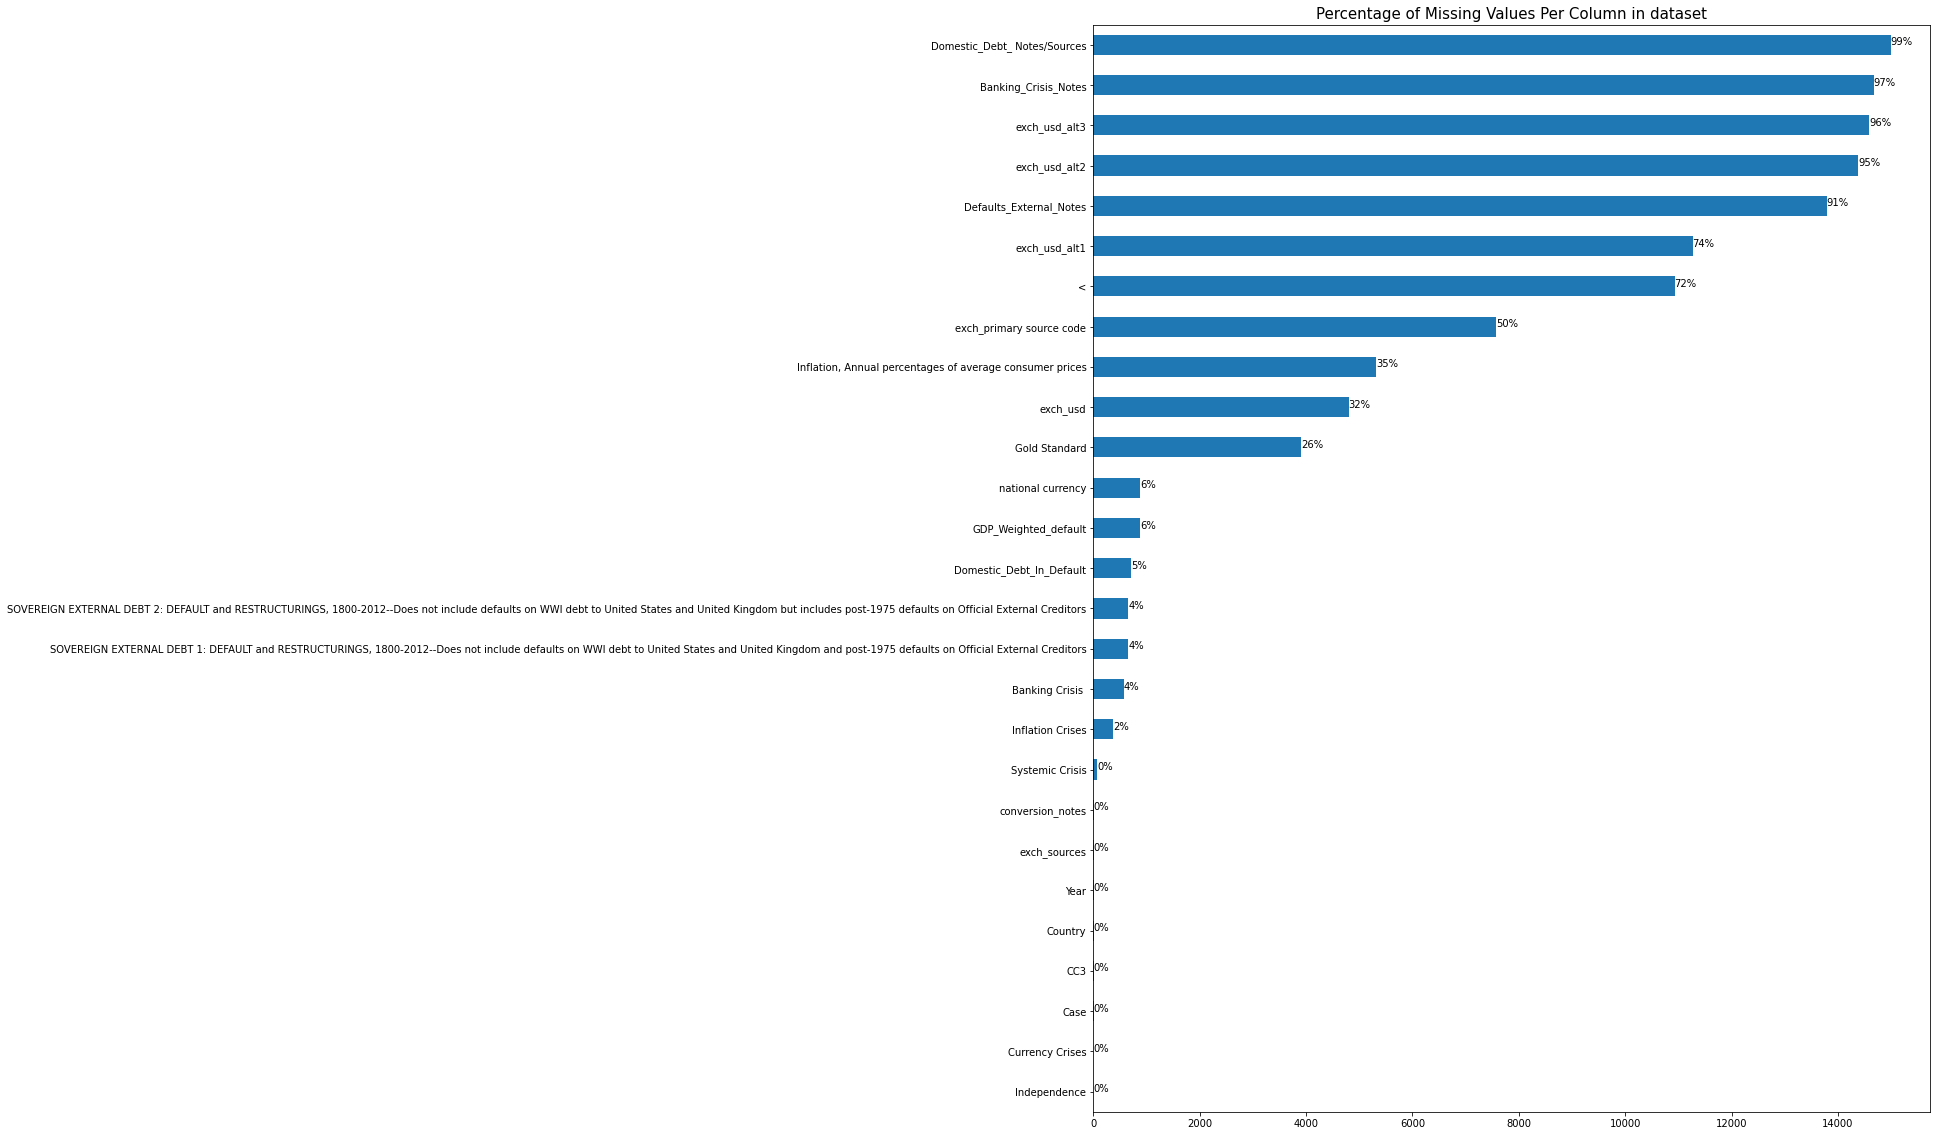

In [ ]:
# Plot missing values in dataset 
ax = dataset.isna().sum().sort_values().plot(kind = 'barh', figsize = (15, 20))
plt.title('Percentage of Missing Values Per Column in dataset', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/dataset.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

In [ ]:
# Check for duplicates
dataset.duplicated().any()

False

In [ ]:
dataset.columns

Index(['Case', 'CC3', 'Country', 'Year', 'Banking Crisis ',
       'Banking_Crisis_Notes', 'Systemic Crisis', 'Gold Standard', 'exch_usd',
       'exch_usd_alt1', 'exch_usd_alt2', 'exch_usd_alt3', 'conversion_notes',
       'national currency', 'exch_primary source code', 'exch_sources',
       'Domestic_Debt_In_Default', 'Domestic_Debt_ Notes/Sources',
       'SOVEREIGN EXTERNAL DEBT 1: DEFAULT and RESTRUCTURINGS, 1800-2012--Does not include defaults on WWI debt to United States and United Kingdom and post-1975 defaults on Official External Creditors',
       'SOVEREIGN EXTERNAL DEBT 2: DEFAULT and RESTRUCTURINGS, 1800-2012--Does not include defaults on WWI debt to United States and United Kingdom but includes post-1975 defaults on Official External Creditors',
       'Defaults_External_Notes', 'GDP_Weighted_default', '<',
       'Inflation, Annual percentages of average consumer prices',
       'Independence', 'Currency Crises', 'Inflation Crises'],
      dtype='object')

#<a name="Outliers"></a>
## 6. Outliers

#<a name="Datatypes"></a>
## 7. Dataset datatypes

In [ ]:
# Dataset datatypes
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15191 entries, 0 to 15190
Data columns (total 27 columns):
 #   Column                                                                                                                                                                                                      Non-Null Count  Dtype  
---  ------                                                                                                                                                                                                      --------------  -----  
 0   Case                                                                                                                                                                                                        15190 non-null  float64
 1   CC3                                                                                                                                                                                        

#<a name="Engineering"></a>
## 8. Feature engineering

In [ ]:
# Data copy
dataset_copy = dataset.copy()
# Drop columns and rows
dataset_copy.drop(['Domestic_Debt_ Notes/Sources', 'Banking_Crisis_Notes','exch_usd_alt2','exch_usd_alt3','<','Defaults_External_Notes','exch_usd_alt1','Case','CC3','conversion_notes','exch_primary source code'], axis=1,inplace=True)
dataset_copy.drop(index=dataset_copy.index[0], axis=0, inplace=True)
origin = dataset_copy.copy()
masks = dataset_copy.isnull()
#masks.head()
#dataset_copy.shape


Categorical features

In [ ]:
# Label encode categorical variables
# Convert categorical variables to categorical objects

#data_cols = dataset_copy.columns.difference(['exch_sources','Domestic_Debt_In_Default','GDP_Weighted_default','Currency Crises','Case','Independence','Inflation Crises','Banking Crisis ','Systemic Crisis', 'Year','SOVEREIGN EXTERNAL DEBT 1: DEFAULT and RESTRUCTURINGS, 1800-2012--Does not include defaults on WWI debt to United States and United Kingdom and post-1975 defaults on Official External Creditors', 'SOVEREIGN EXTERNAL DEBT 2: DEFAULT and RESTRUCTURINGS, 1800-2012--Does not include defaults on WWI debt to United States and United Kingdom but includes post-1975 defaults on Official External Creditors']).tolist()
data_cols = ['national currency','exch_sources']
dataset_copy[data_cols] = dataset_copy[data_cols].astype(str).apply(LabelEncoder().fit_transform)
#data_cols_diff = dataset_copy.columns.difference(['national currency','exch_sources'])
#dataset_copy[data_cols_diff] = dataset_copy[data_cols_diff].astype(category)
cf = dataset_copy.where(~masks, origin)
cf = cf.dropna(axis=0, subset=['exch_usd','Gold Standard'])
cf = cf._convert(numeric=True)

In [ ]:
#cf_cols_means = ['Inflation, Annual percentages of average consumer prices','national currency'] 
cf_cols_value_counts = ['Banking Crisis ','Systemic Crisis','Domestic_Debt_In_Default','Inflation Crises','SOVEREIGN EXTERNAL DEBT 1: DEFAULT and RESTRUCTURINGS, 1800-2012--Does not include defaults on WWI debt to United States and United Kingdom and post-1975 defaults on Official External Creditors','GDP_Weighted_default','SOVEREIGN EXTERNAL DEBT 2: DEFAULT and RESTRUCTURINGS, 1800-2012--Does not include defaults on WWI debt to United States and United Kingdom but includes post-1975 defaults on Official External Creditors'] 
cf[cf_cols_value_counts] = cf[cf_cols_value_counts].apply(lambda x: x.fillna(x.value_counts().index[0]))
cf['Inflation, Annual percentages of average consumer prices'].fillna(cf['Inflation, Annual percentages of average consumer prices'].median(), inplace=True)
cf['national currency'].fillna(cf['national currency'].median(), inplace=True)
cf['exch_usd'].fillna(cf['exch_usd'].median(), inplace=True)

#cf[cf_cols_means].isnull().sum()


In [ ]:
cf.columns

Index(['Country', 'Year', 'Banking Crisis ', 'Systemic Crisis',
       'Gold Standard', 'exch_usd', 'national currency', 'exch_sources',
       'Domestic_Debt_In_Default',
       'SOVEREIGN EXTERNAL DEBT 1: DEFAULT and RESTRUCTURINGS, 1800-2012--Does not include defaults on WWI debt to United States and United Kingdom and post-1975 defaults on Official External Creditors',
       'SOVEREIGN EXTERNAL DEBT 2: DEFAULT and RESTRUCTURINGS, 1800-2012--Does not include defaults on WWI debt to United States and United Kingdom but includes post-1975 defaults on Official External Creditors',
       'GDP_Weighted_default',
       'Inflation, Annual percentages of average consumer prices',
       'Independence', 'Currency Crises', 'Inflation Crises'],
      dtype='object')

In [ ]:
# Plot missing values in dataset 
ax = cf.isna().sum().sort_values().plot(kind = 'barh', figsize = (15, 20))
plt.title('Percentage of Missing Values Per Column in dataset', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/dataset.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

In [ ]:
cf.isnull().sum()

Country                                                                                                                                                                                                       0
Year                                                                                                                                                                                                          0
Banking Crisis                                                                                                                                                                                                0
Systemic Crisis                                                                                                                                                                                               0
Gold Standard                                                                                                                                                           

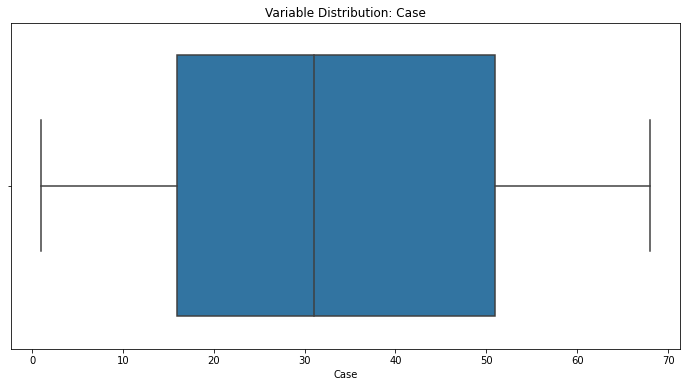

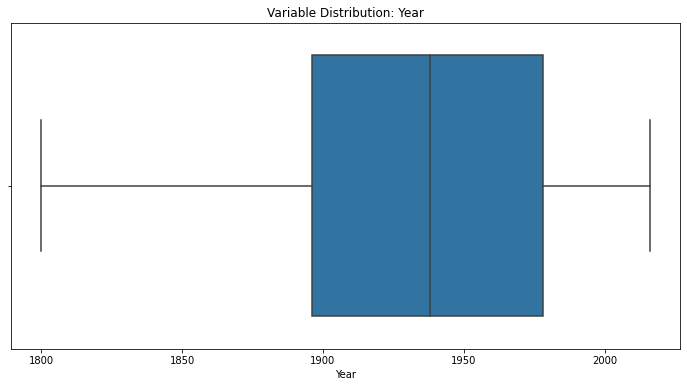

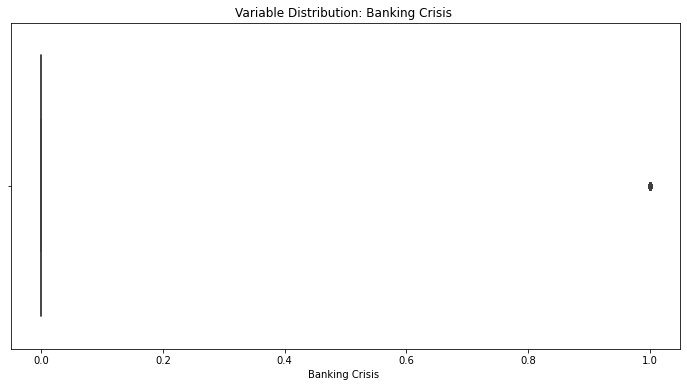

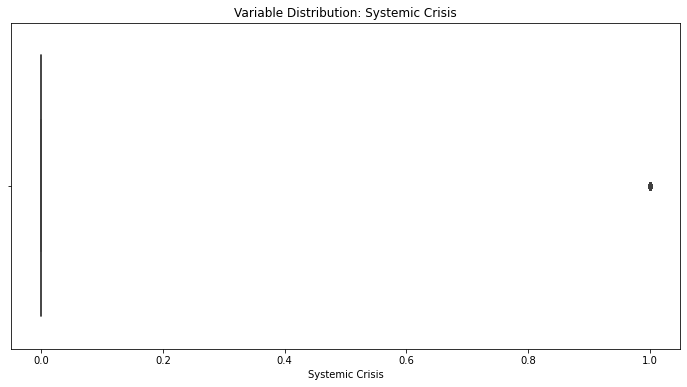

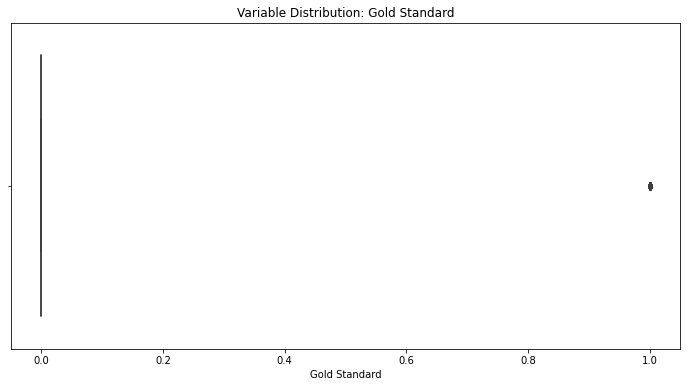

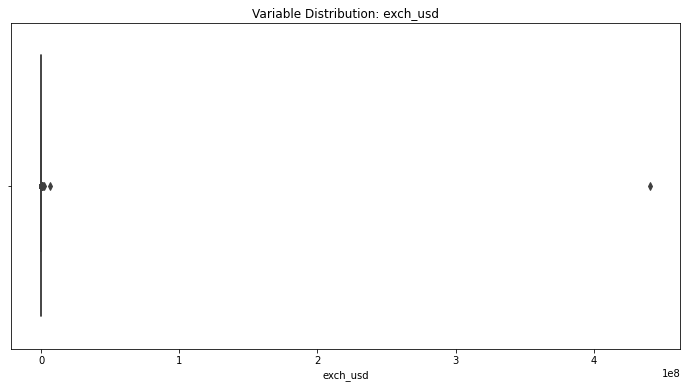

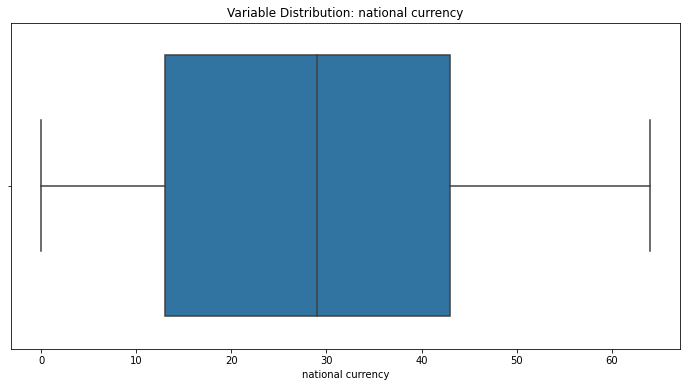

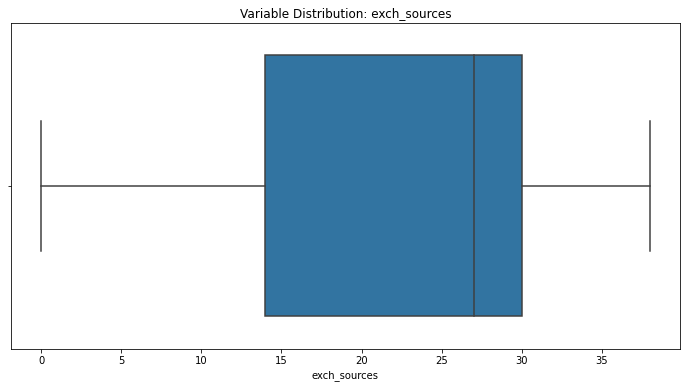

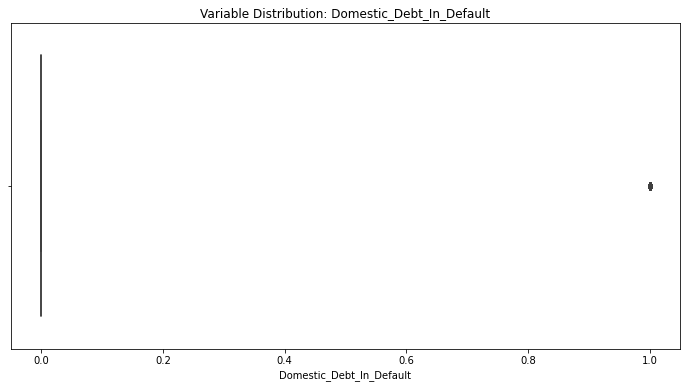

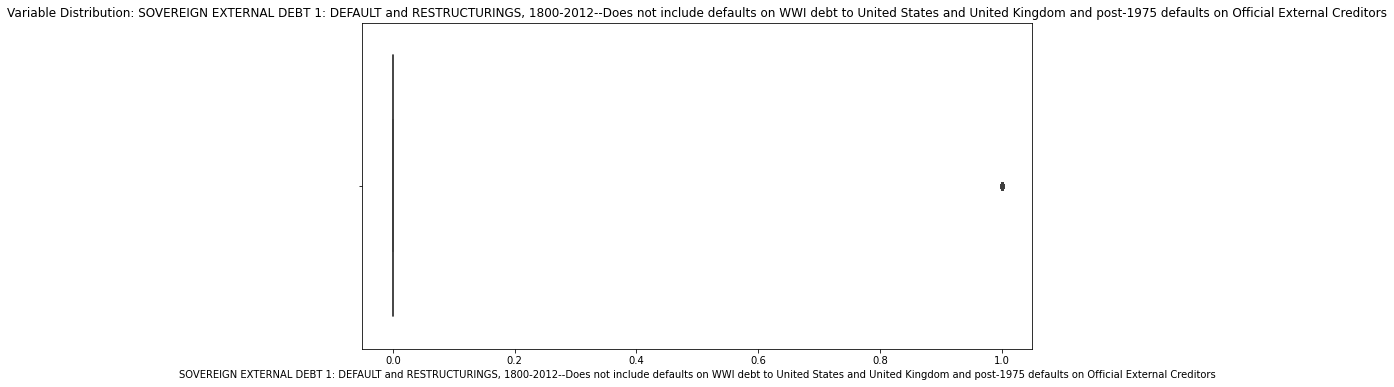

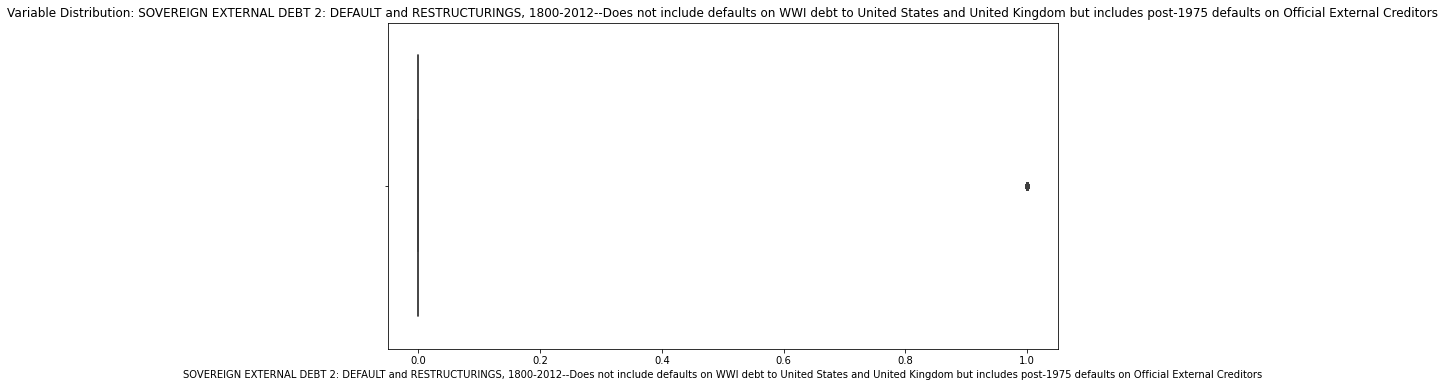

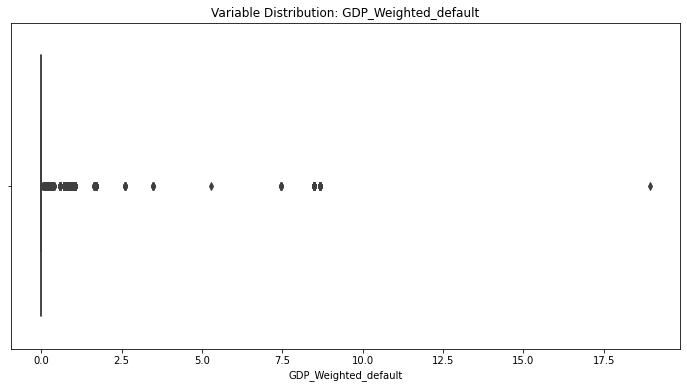

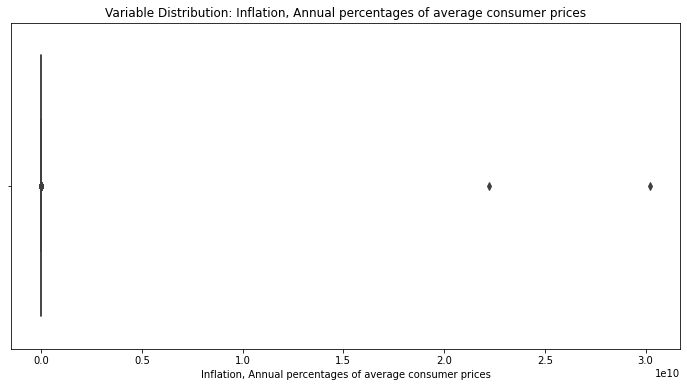

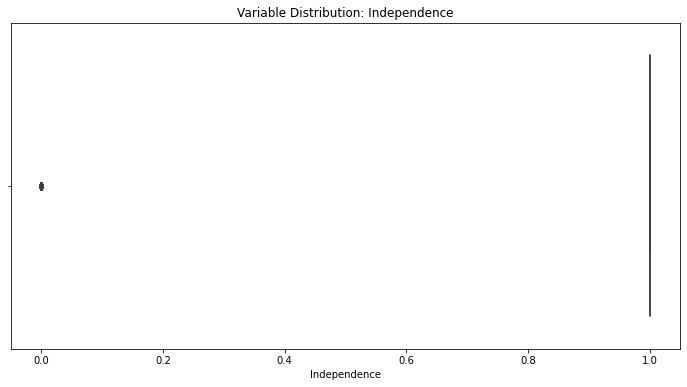

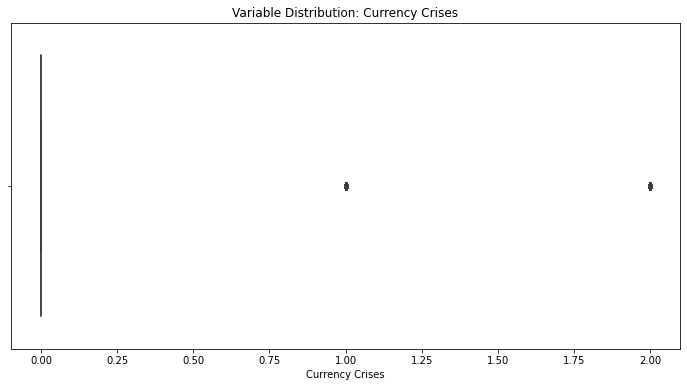

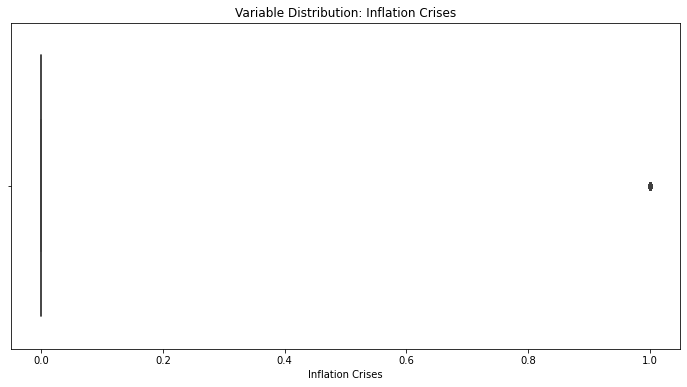

In [ ]:
# A box plot showing outliers
#list = ['national currency','exch_usd','Systemic Crisis','Gold Standard','Banking Crisis','exch_sources',]
for i in cf.columns :
  plt.figure(figsize=(12, 6))
  sns.boxplot(cf[i])
  plt.title('Variable Distribution: {}'.format(i))

In [ ]:
cf.columns  

Index(['Country', 'Year', 'Banking Crisis ', 'Systemic Crisis',
       'Gold Standard', 'exch_usd', 'national currency', 'exch_sources',
       'Domestic_Debt_In_Default',
       'SOVEREIGN EXTERNAL DEBT 1: DEFAULT and RESTRUCTURINGS, 1800-2012--Does not include defaults on WWI debt to United States and United Kingdom and post-1975 defaults on Official External Creditors',
       'SOVEREIGN EXTERNAL DEBT 2: DEFAULT and RESTRUCTURINGS, 1800-2012--Does not include defaults on WWI debt to United States and United Kingdom but includes post-1975 defaults on Official External Creditors',
       'GDP_Weighted_default',
       'Inflation, Annual percentages of average consumer prices',
       'Independence', 'Currency Crises', 'Inflation Crises'],
      dtype='object')

In [ ]:
cf.rename(columns = {'Country':'country','Banking Crisis ':'banking_crisis','Systemic Crisis':'systemic_crisis','Gold Standard':'gold_standard','national currency':'national_currency','Year':'year','Domestic_Debt_In_Default':'domestic_debt_in_default','SOVEREIGN EXTERNAL DEBT 1: DEFAULT and RESTRUCTURINGS, 1800-2012--Does not include defaults on WWI debt to United States and United Kingdom and post-1975 defaults on Official External Creditors':'soreign_extenal_deb_1','SOVEREIGN EXTERNAL DEBT 2: DEFAULT and RESTRUCTURINGS, 1800-2012--Does not include defaults on WWI debt to United States and United Kingdom but includes post-1975 defaults on Official External Creditors':'soreign_extenal_deb_2','GDP_Weighted_default':'gdp_weighted_default','Inflation, Annual percentages of average consumer prices':'inflation_annual_percentages_average','Independence':'independence','Currency Crises':'currency_crises','Inflation Crises':'inflation_crises'}, inplace = True)

In [ ]:
cf.to_csv('global_crisis_data_clean.csv',index=False)

In [ ]:
cf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8092 entries, 32 to 14756
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   country                               8092 non-null   object 
 1   year                                  8092 non-null   float64
 2   banking_crisis                        8092 non-null   float64
 3   systemic_crisis                       8092 non-null   float64
 4   gold_standard                         8092 non-null   int64  
 5   exch_usd                              8092 non-null   float64
 6   national_currency                     8092 non-null   float64
 7   exch_sources                          8092 non-null   int64  
 8   domestic_debt_in_default              8092 non-null   float64
 9   soreign_extenal_deb_1                 8092 non-null   float64
 10  soreign_extenal_deb_2                 8092 non-null   float64
 11  gdp_weighted_de

# <a name="Dates"></a>
## 9. Date features EDA

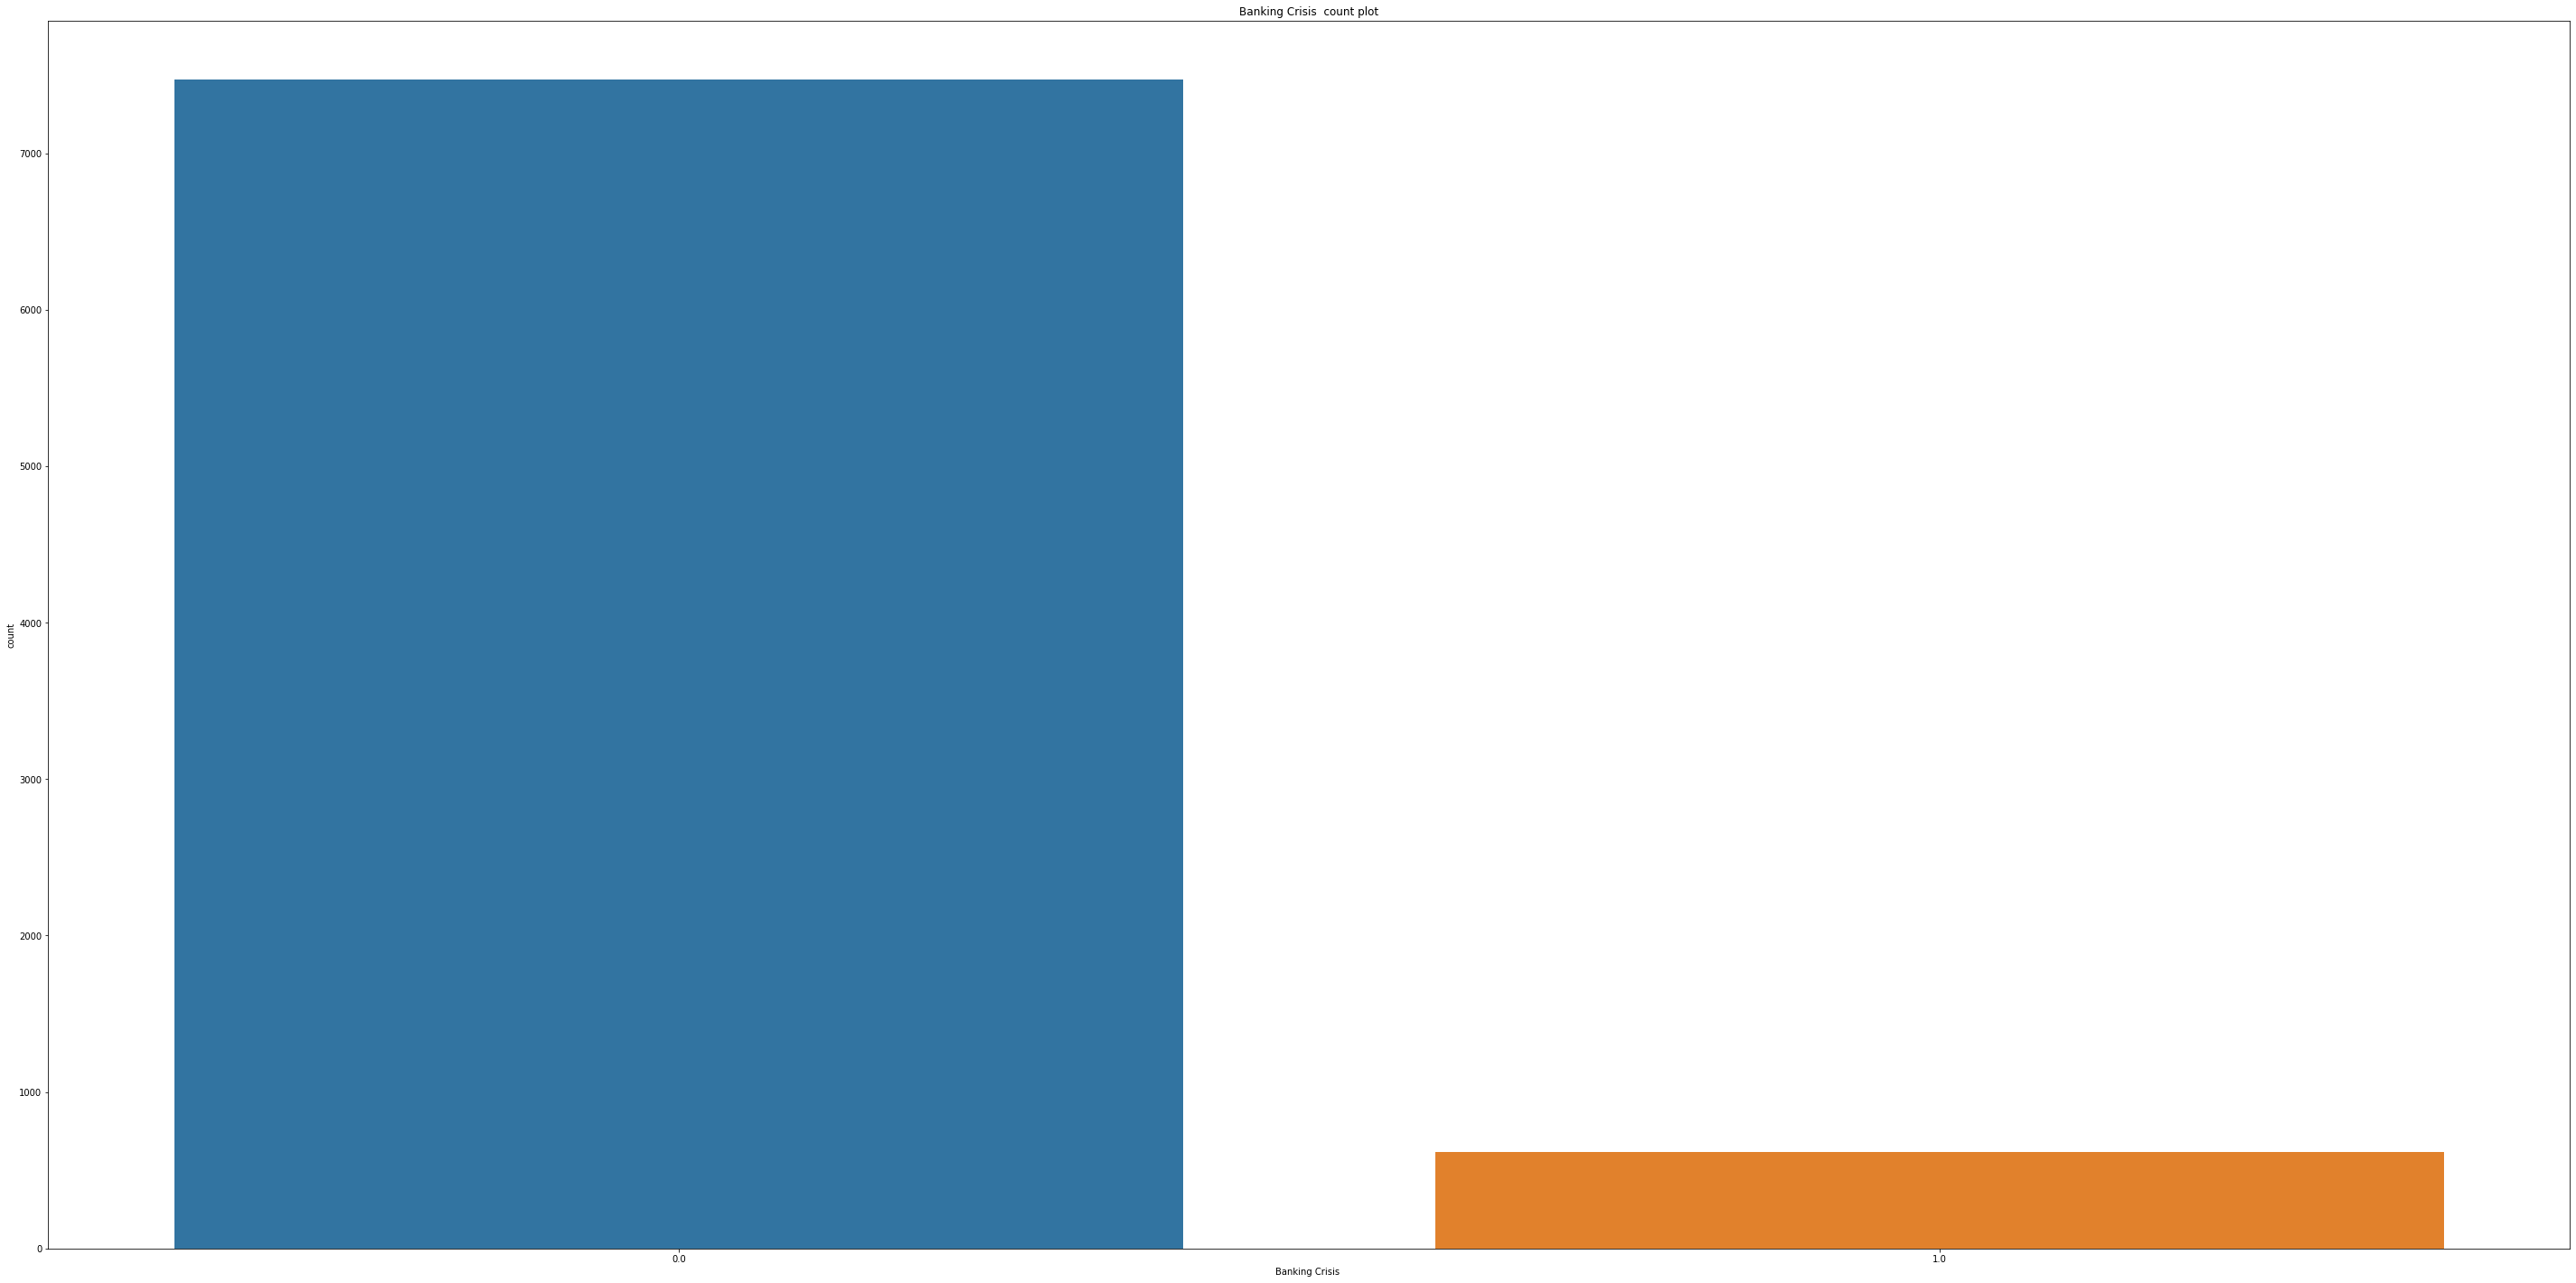

In [ ]:
# Banking Crisis countplot
plt.figure(figsize = (50, 25))
sns.countplot(x = 'Banking Crisis ', data = cf)
plt.title('Banking Crisis  count plot')
plt.show()

<Figure size 14400x14400 with 0 Axes>

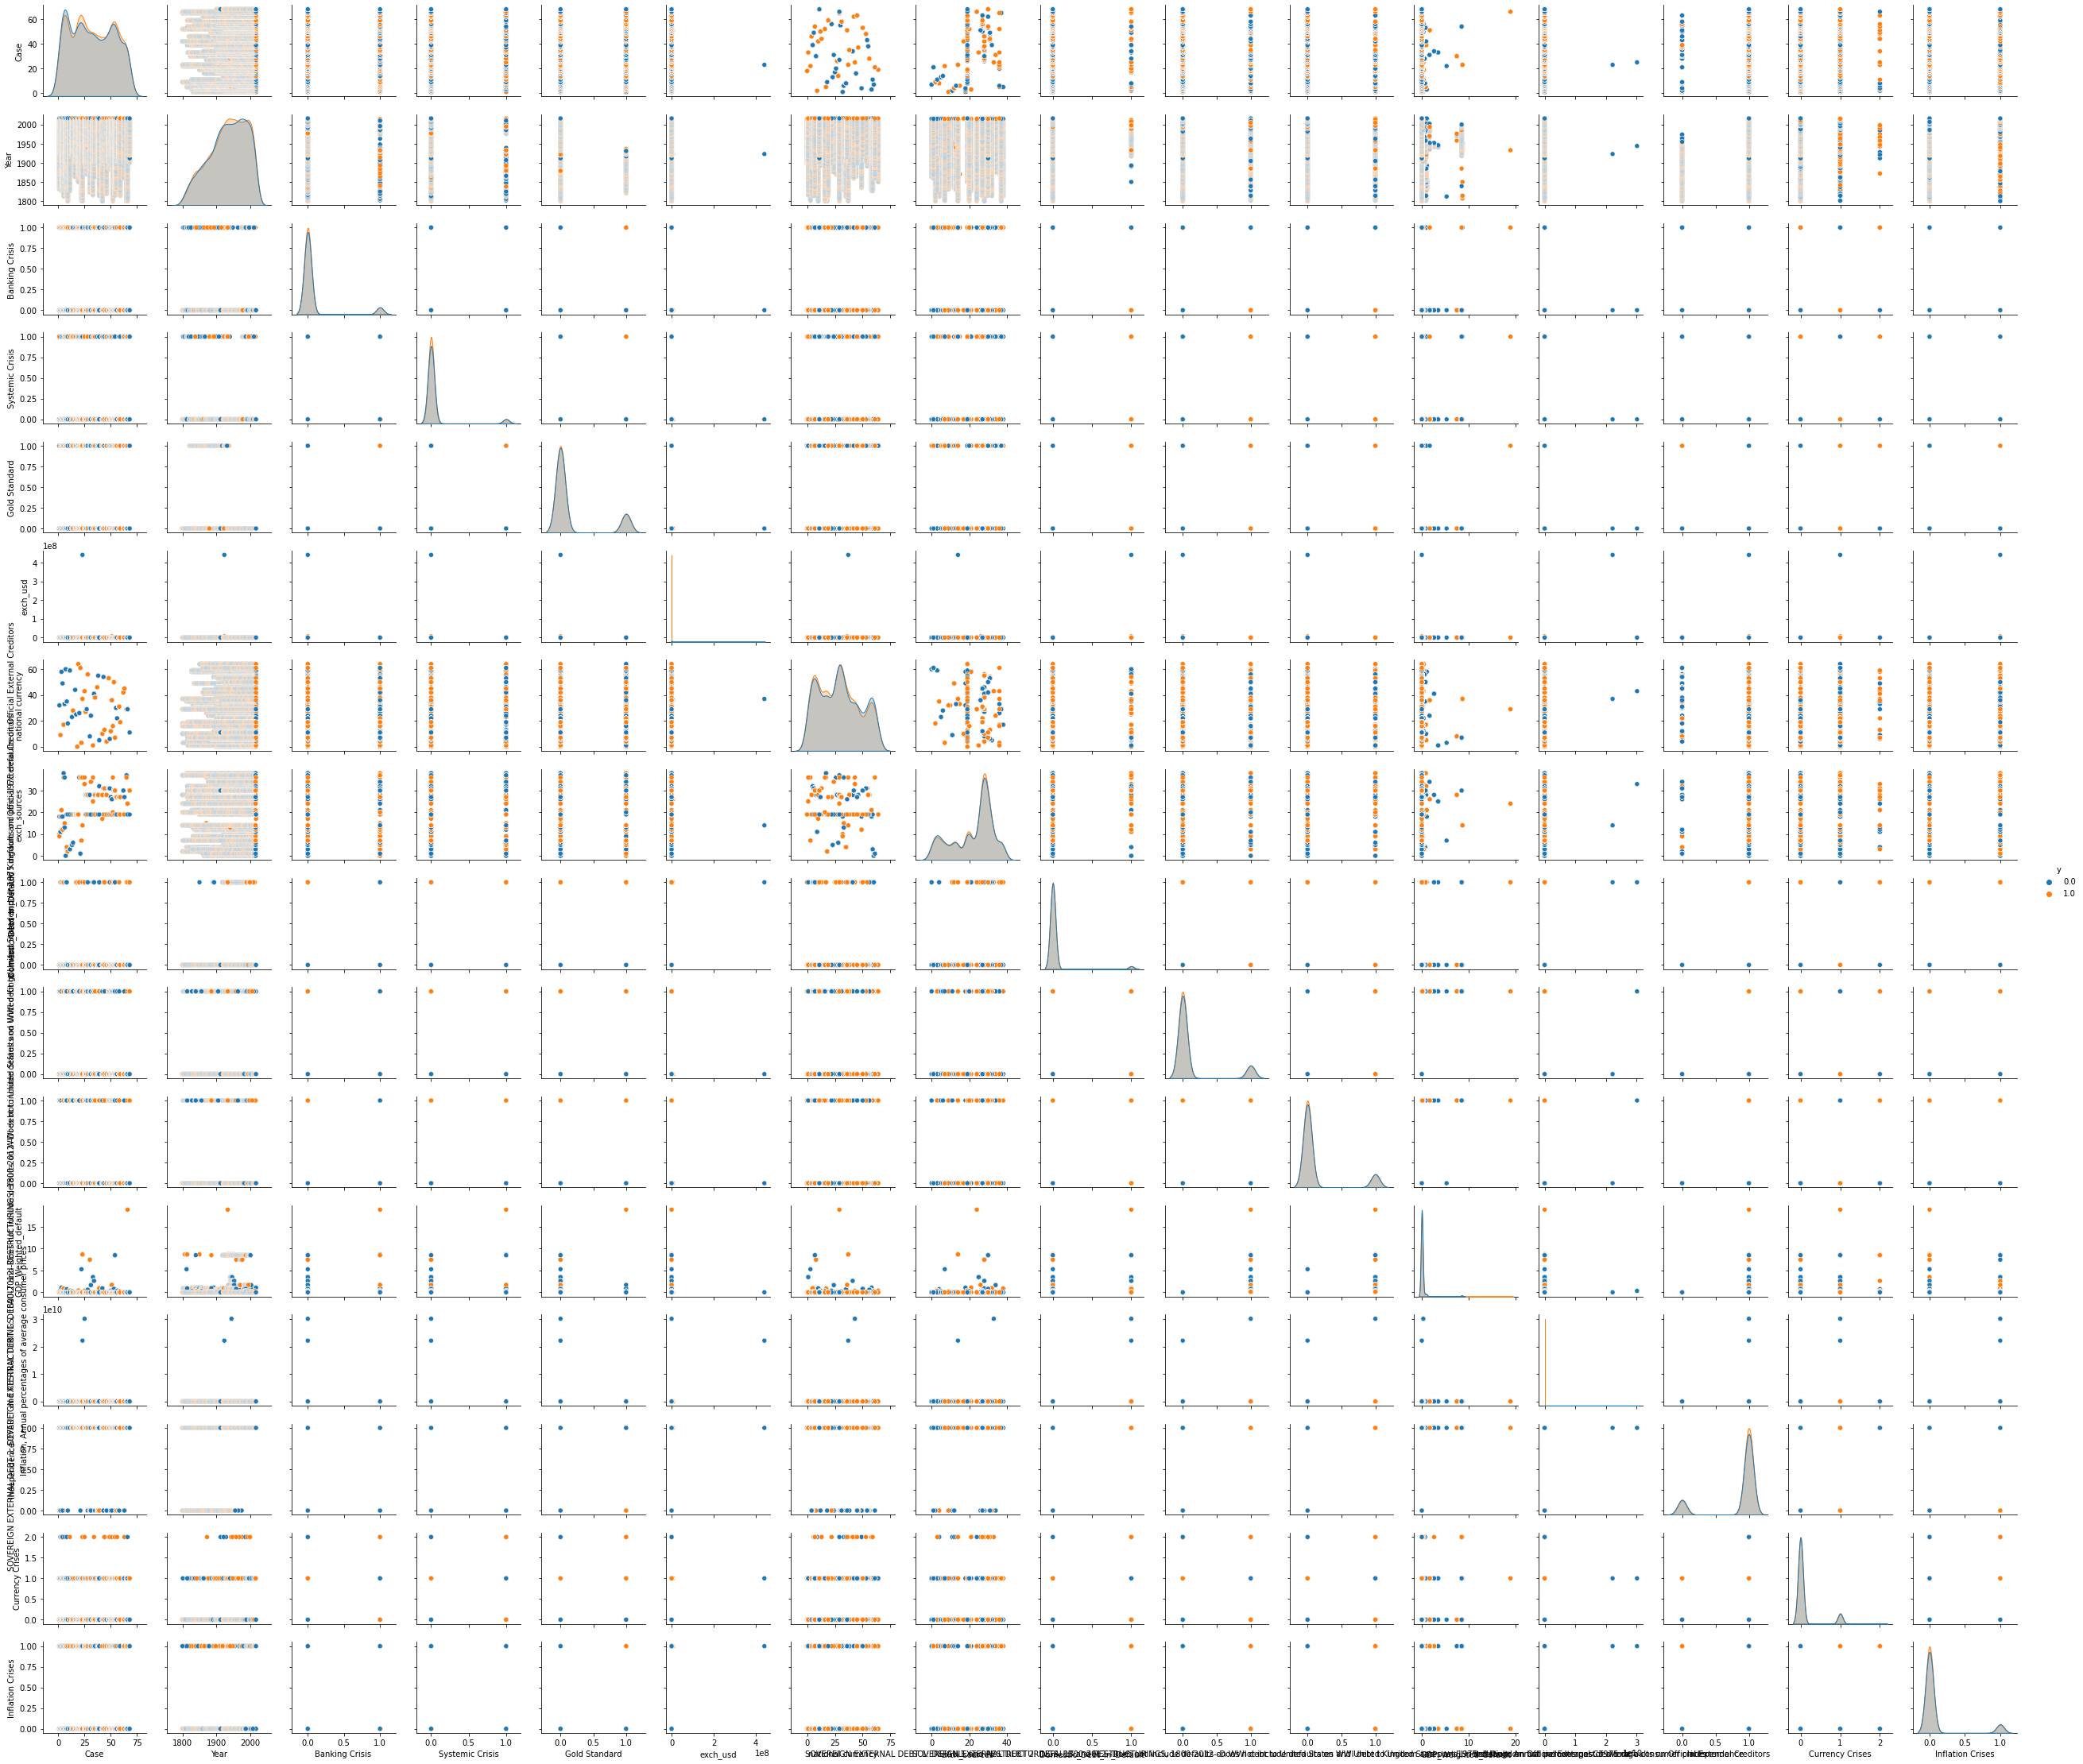

<Figure size 14400x14400 with 0 Axes>

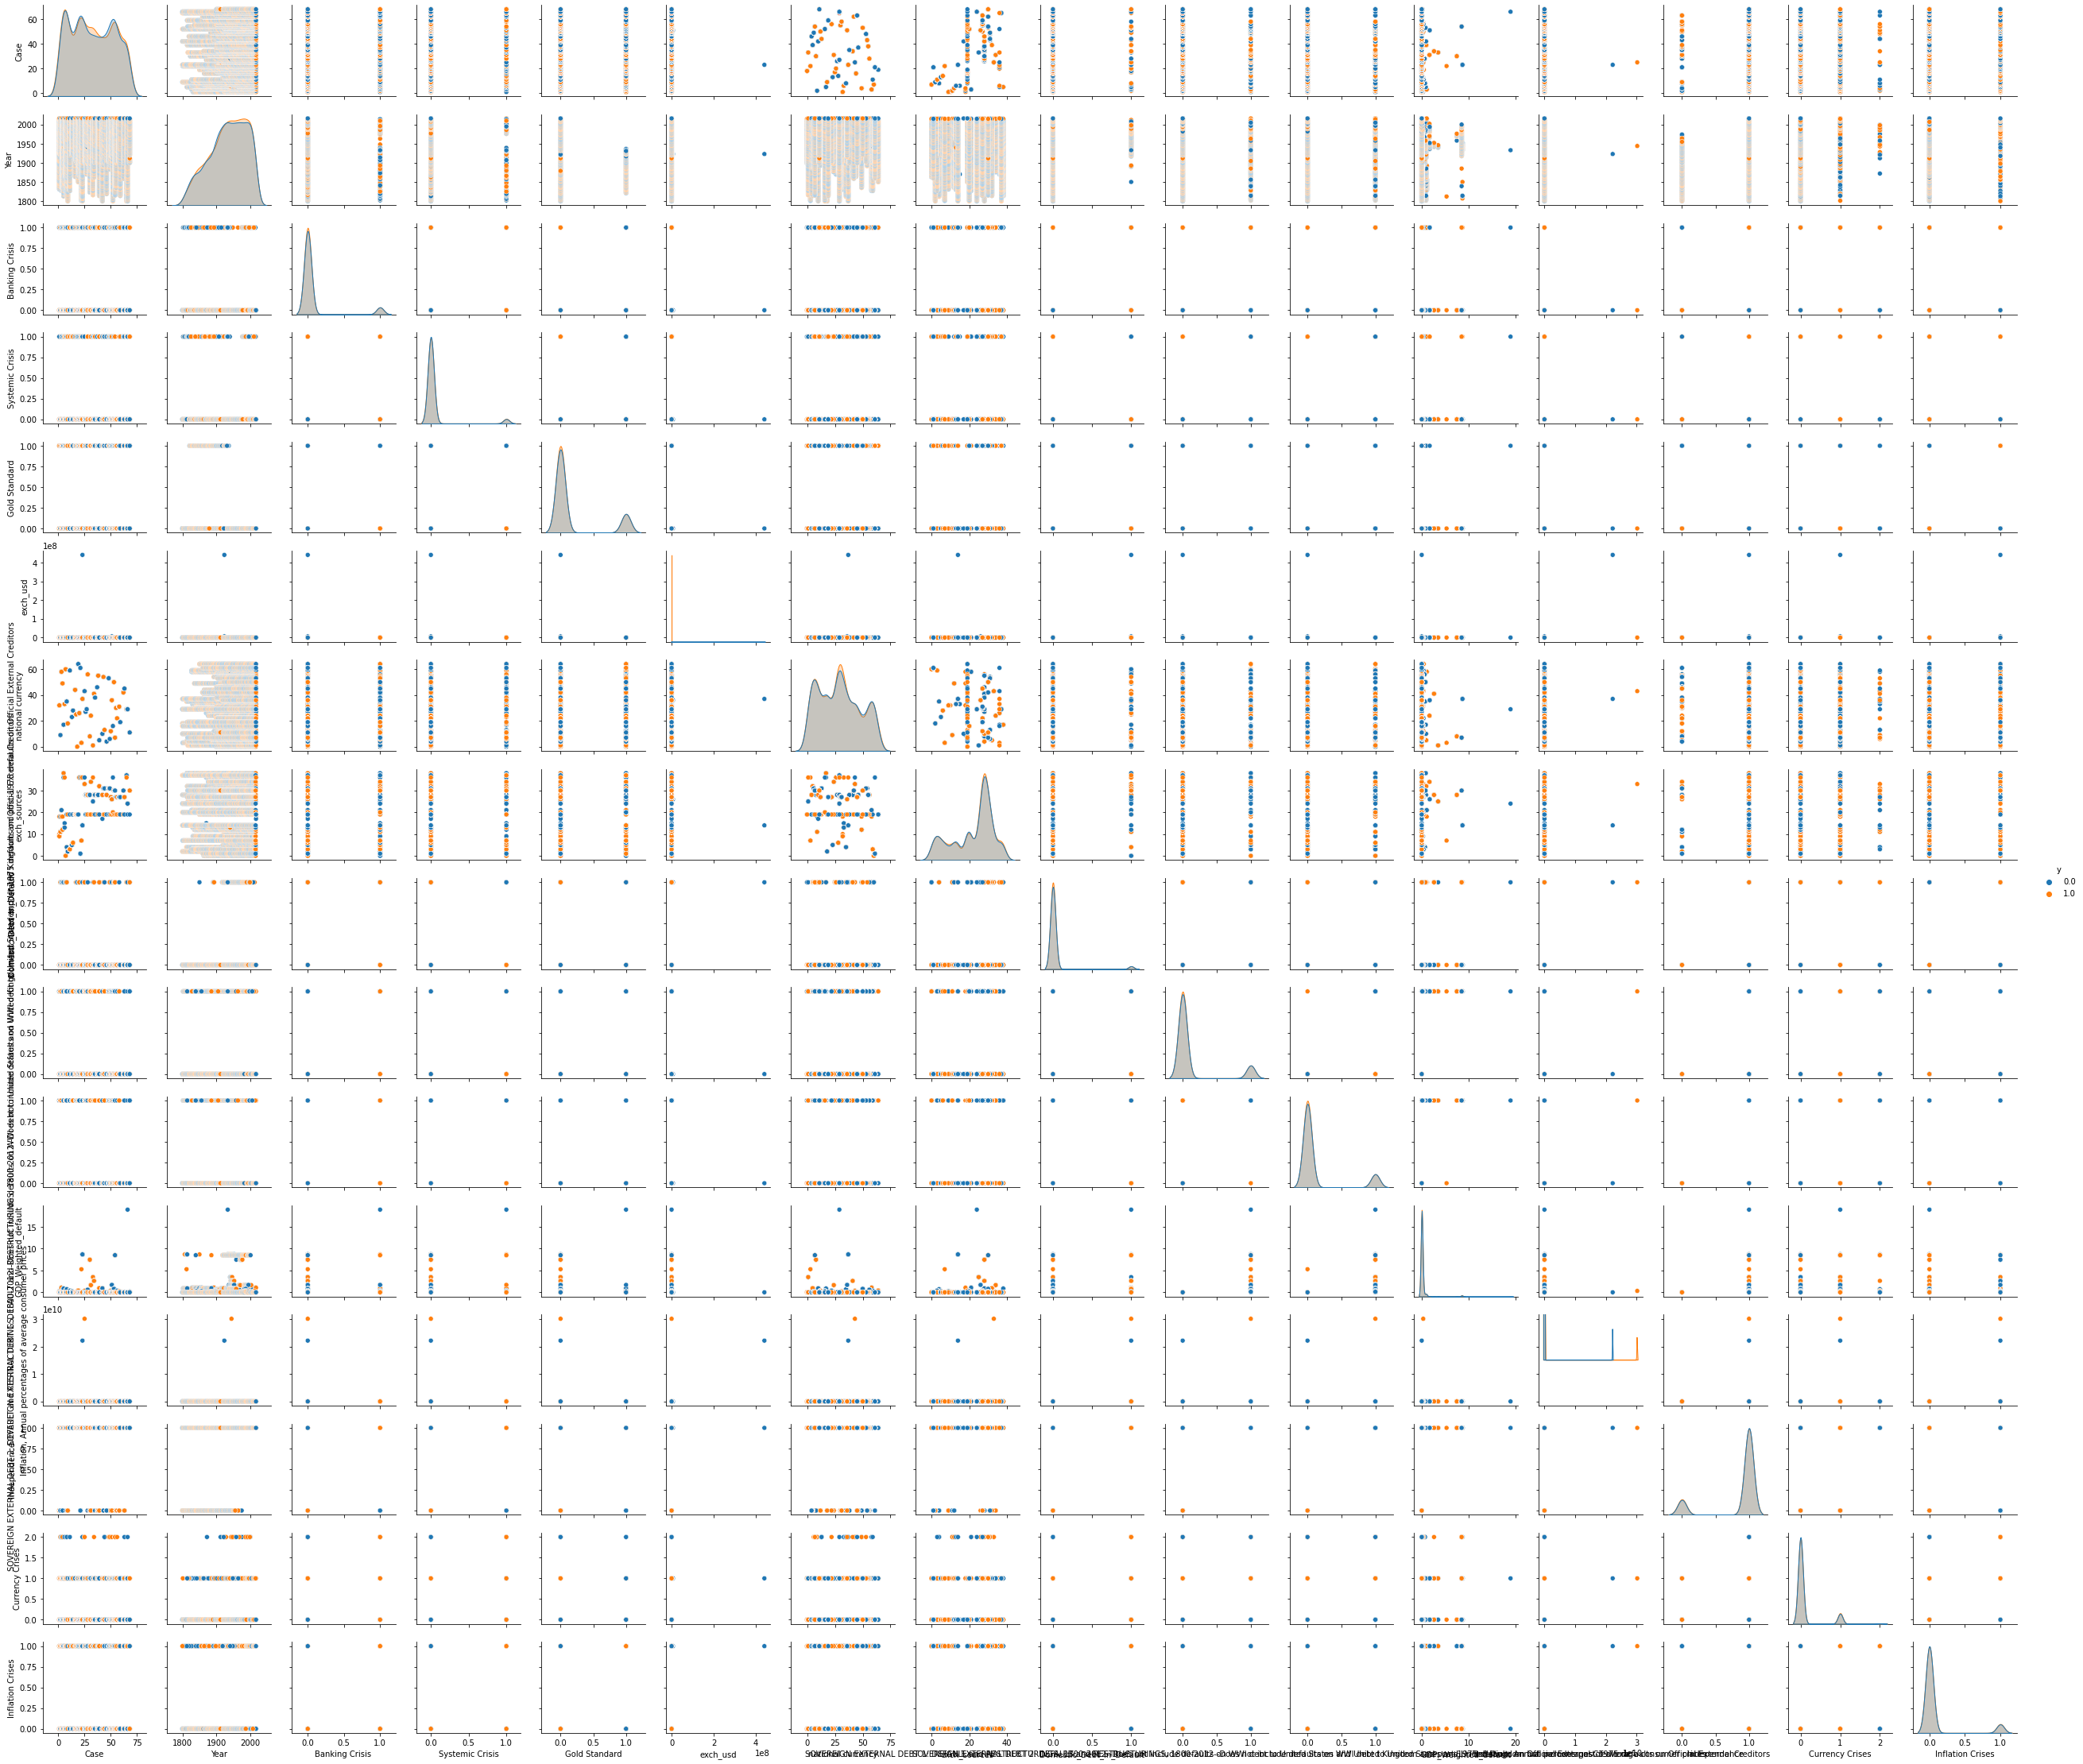

In [ ]:
cf["y"] = np.random.choice([1., 0.], size=len(cf))
plt.figure(figsize = (200, 200))
sns.pairplot(cf, vars=cf.columns[:-1], hue="y")
plt.show()

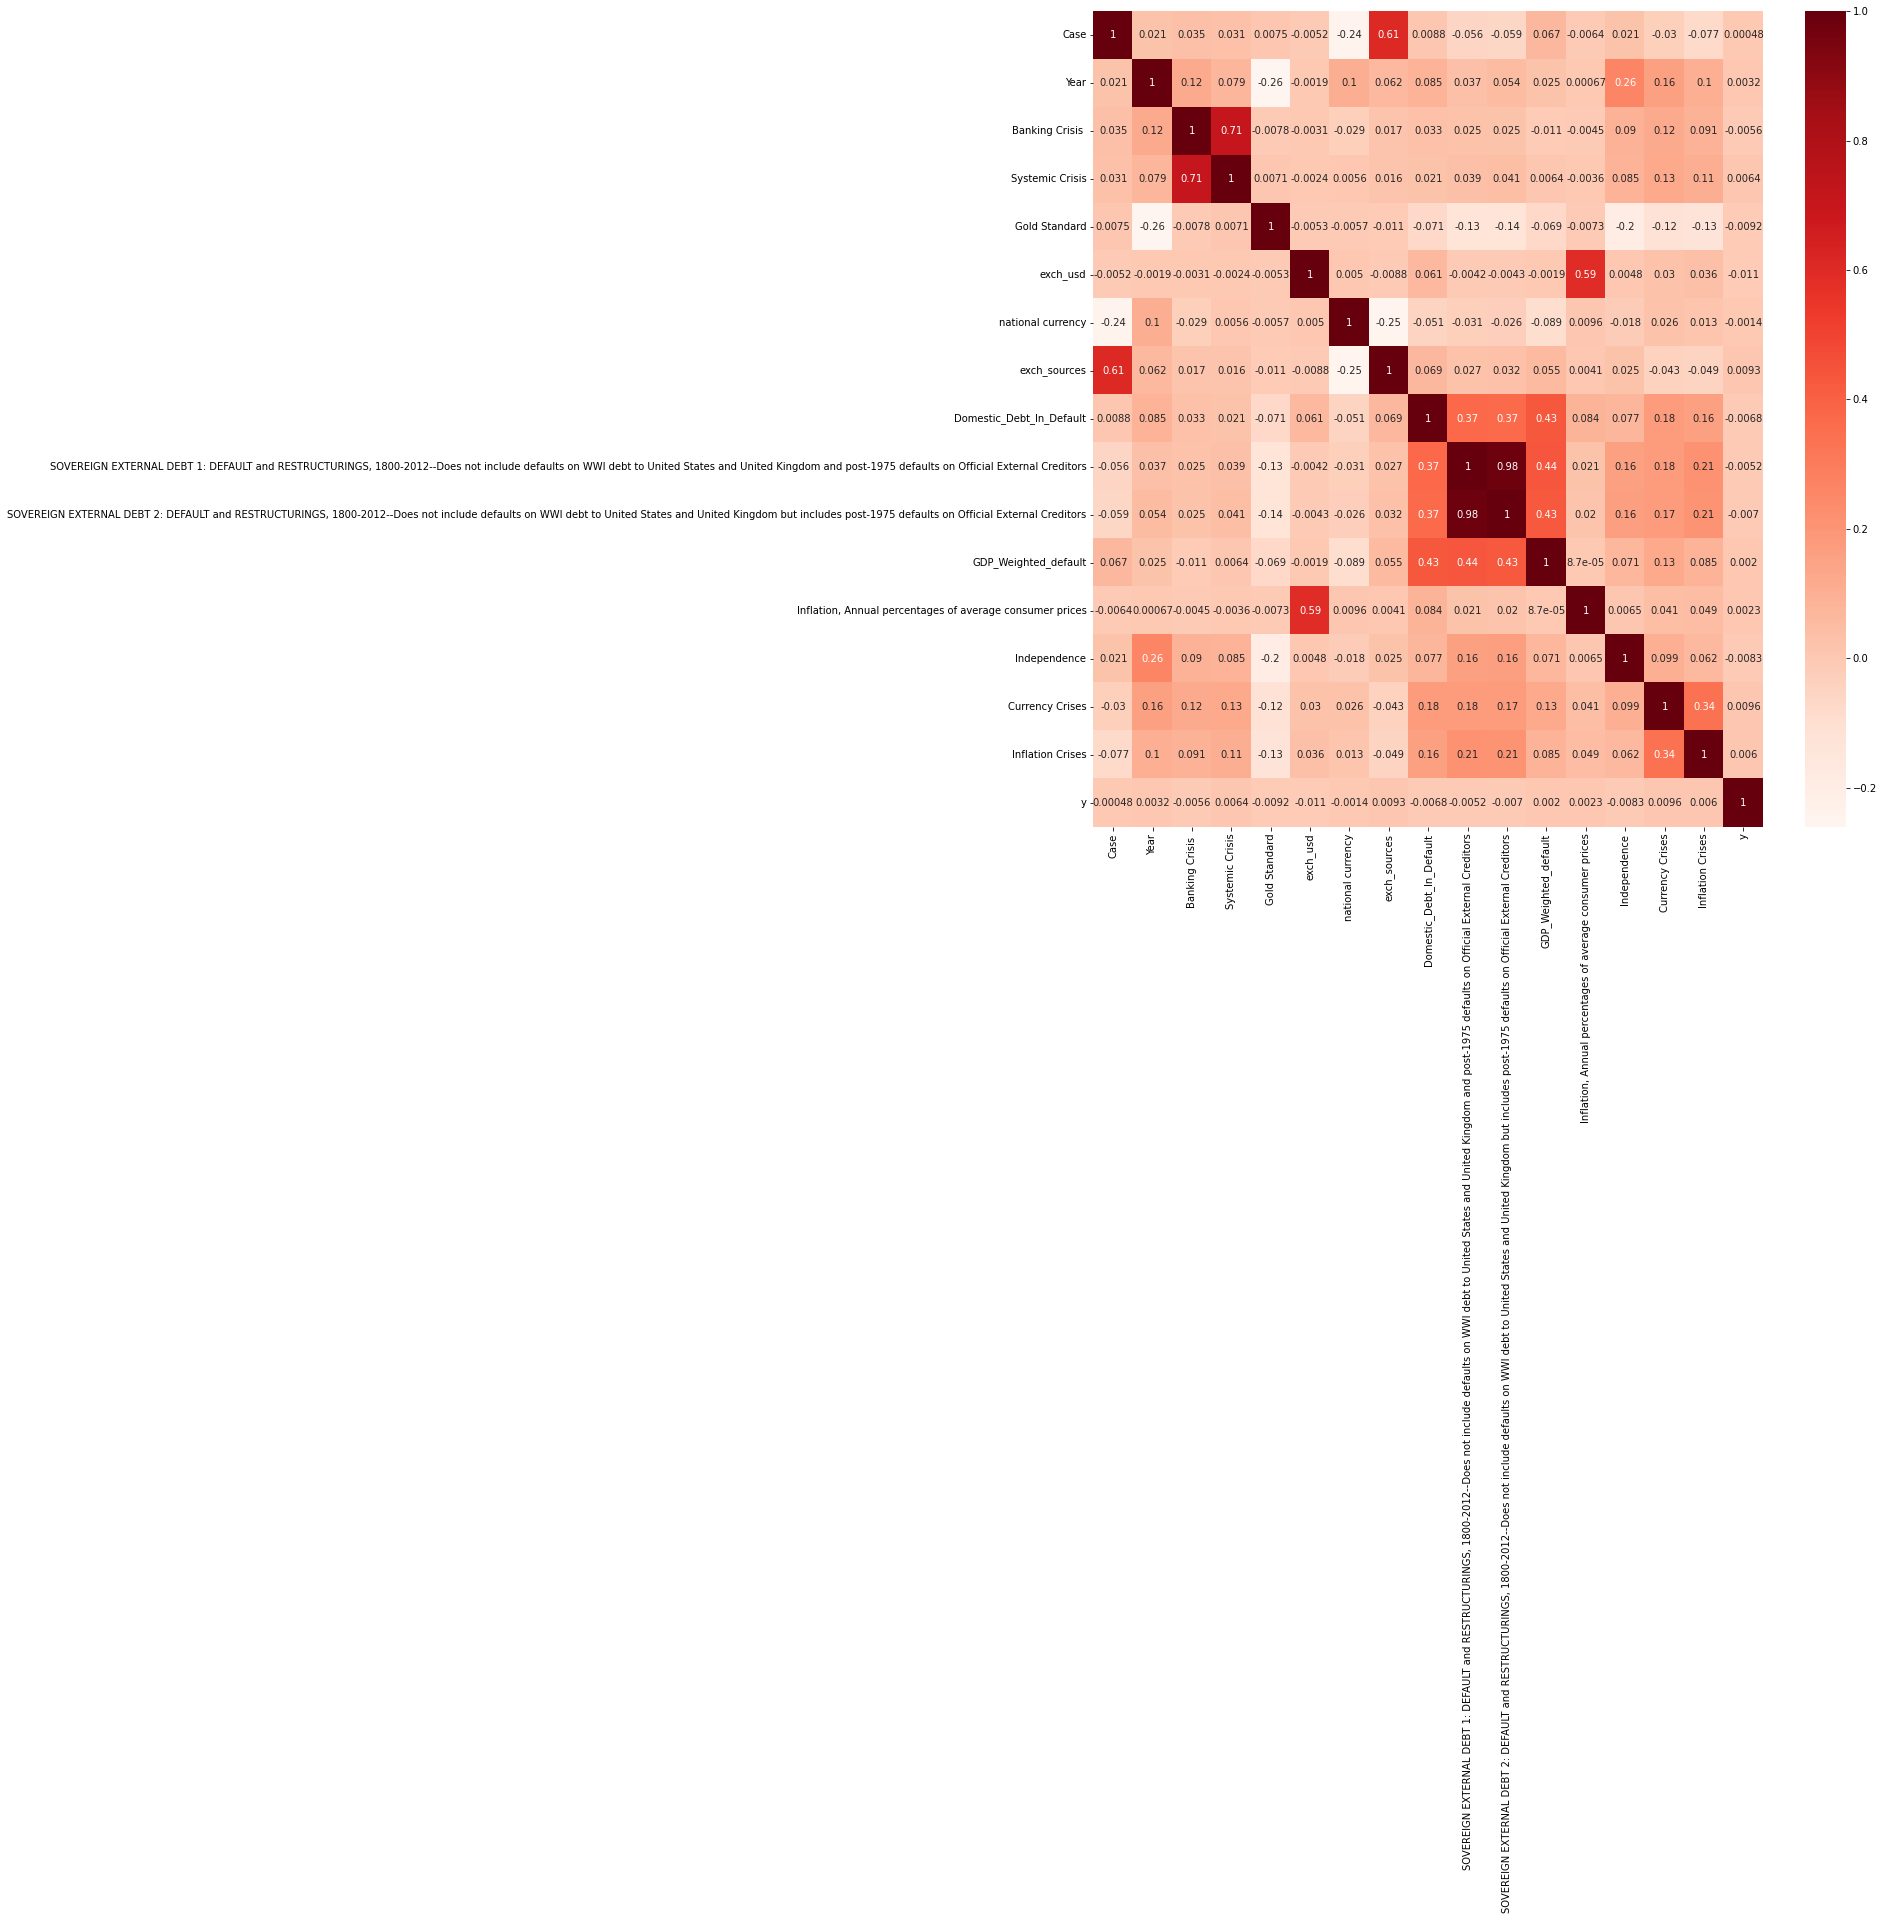

In [ ]:
#Using Pearson Correlation
plt.figure(figsize=(15,15))
cor = cf.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
main_cols = cf.columns.difference(['Banking Crisis ']).tolist()
X = cf[main_cols]
y = cf['Banking Crisis ']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1, random_state=None)

In [ ]:

d = {'col1': y_train}
y_train = pd.DataFrame(data=d)

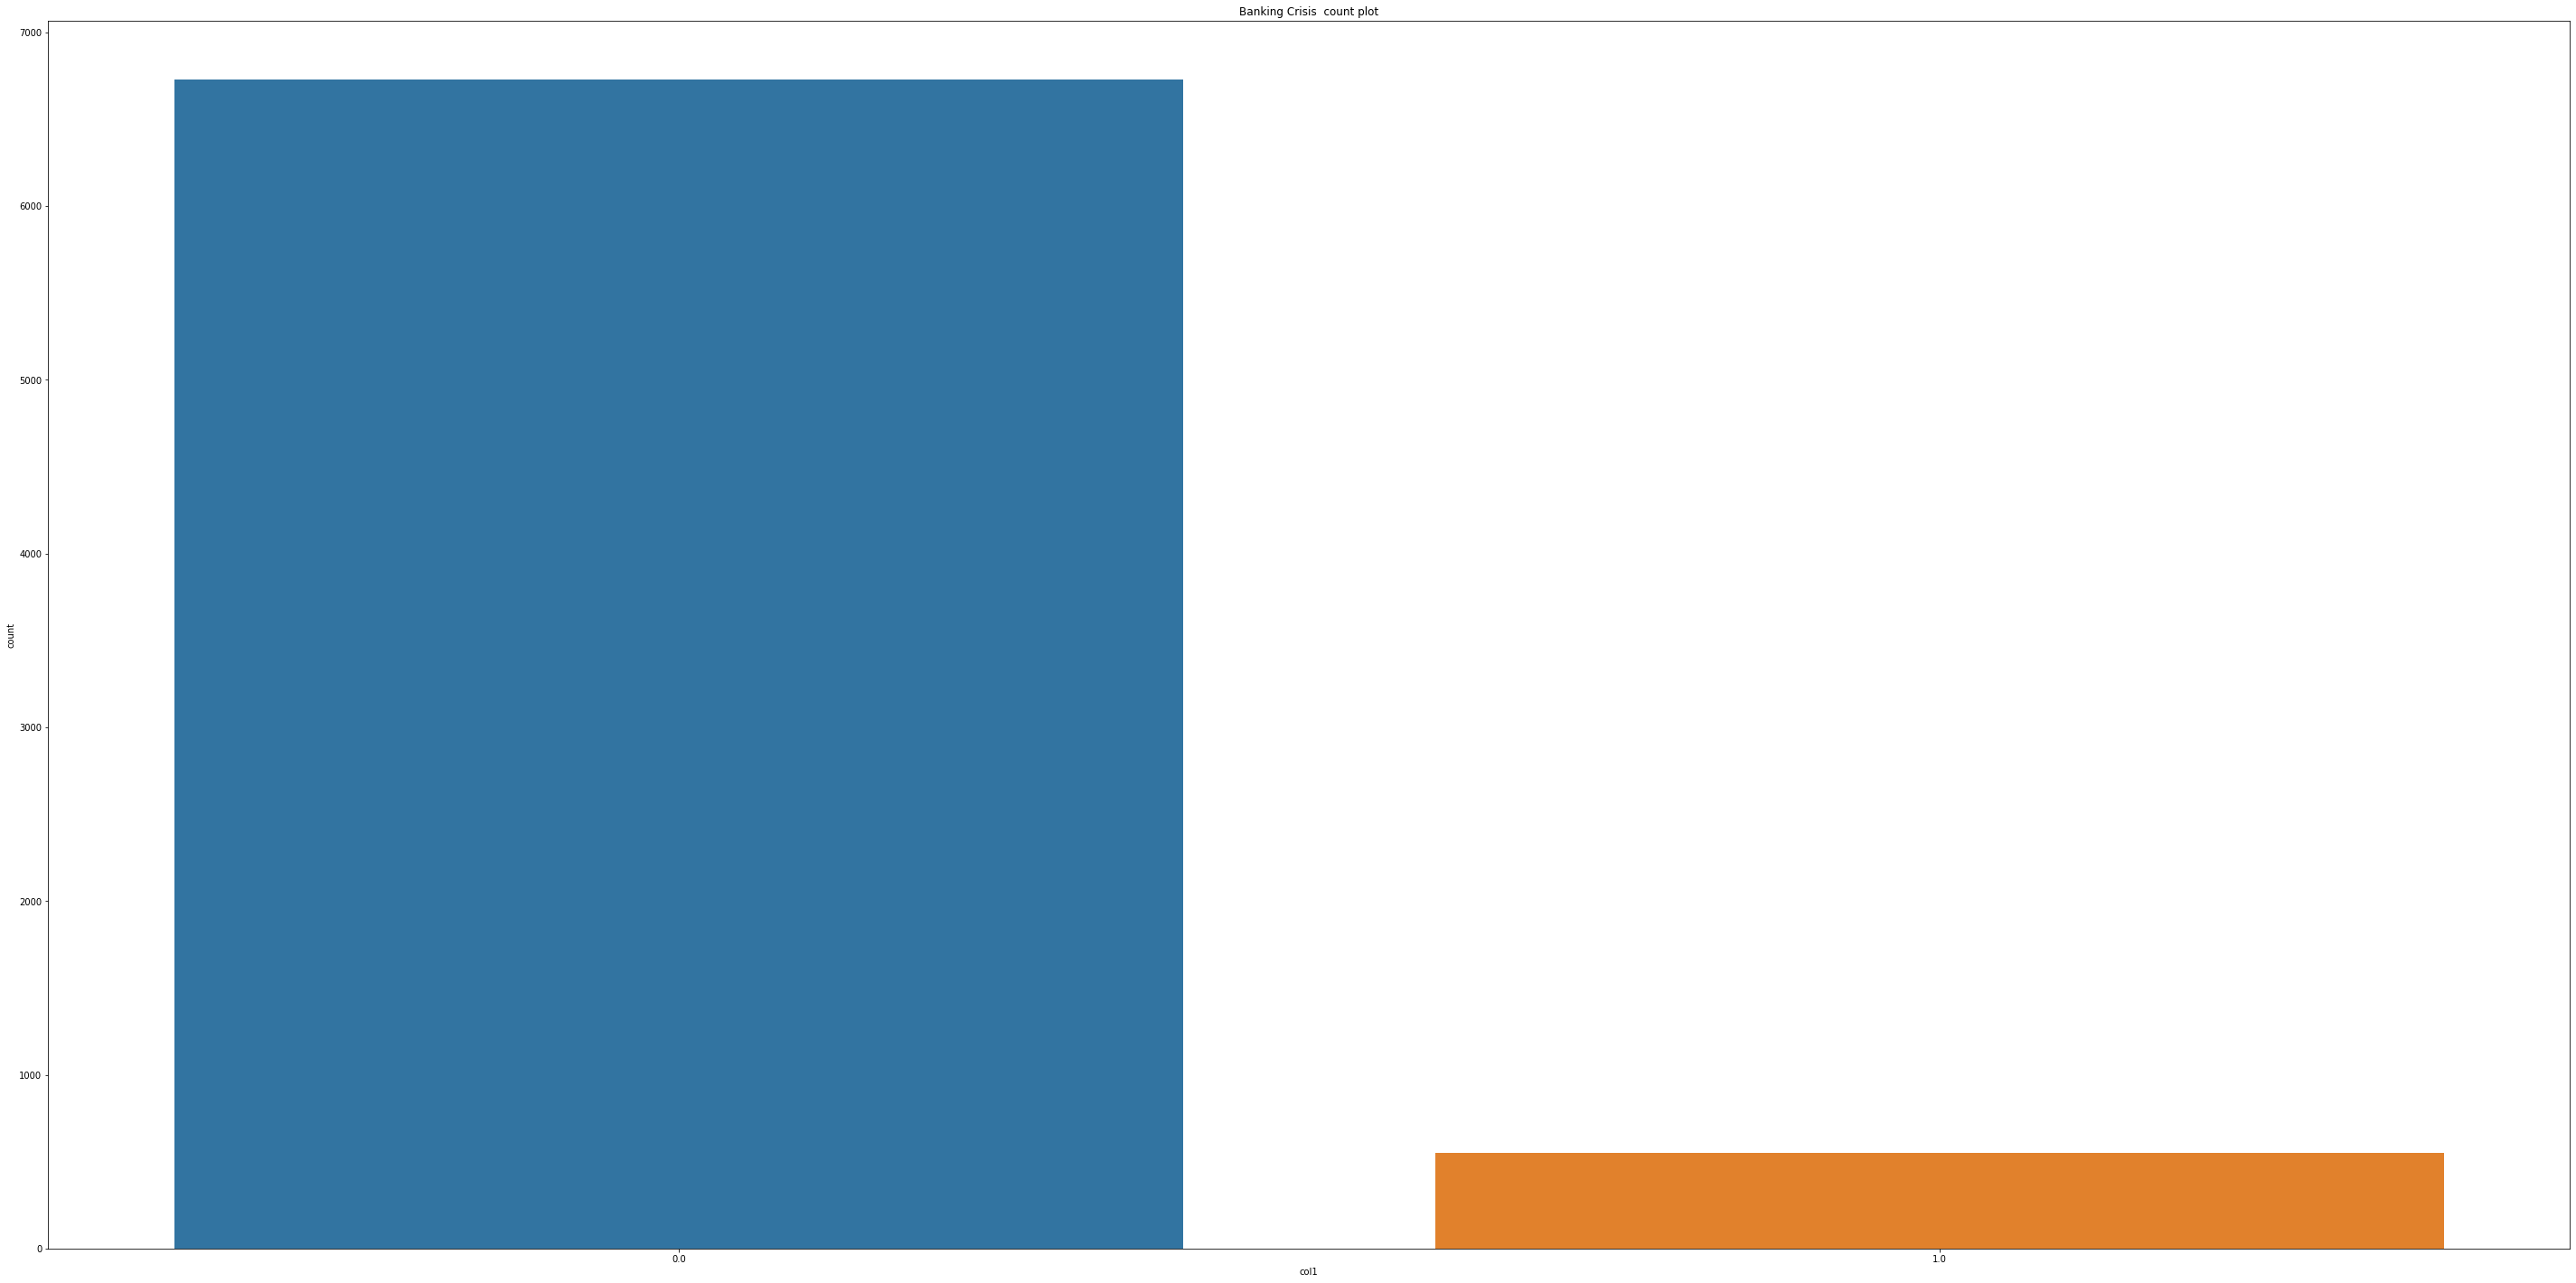

In [ ]:
# Banking Crisis countplot
plt.figure(figsize = (50, 25))
sns.countplot(x = 'col1', data = y_train)
plt.title('Banking Crisis  count plot')
plt.show()

In [ ]:
print(y_train.shape)
print(y_test.shape)

(7282, 1)
(810,)


#<a name="Modelling"></a>

##  10.  Modelling Ml

Logistic Regression

In [ ]:
# Grid search cross validation

grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression(solver='liblinear')
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l1'}
accuracy : 0.9631977419014456


In [ ]:
logreg2=LogisticRegression(C=100,penalty="l1",solver='liblinear')
logreg2.fit(X_train,y_train)
y_pred = logreg2.predict(X_test)
print("score",logreg2.score(X_test,y_test))


score 0.9654320987654321


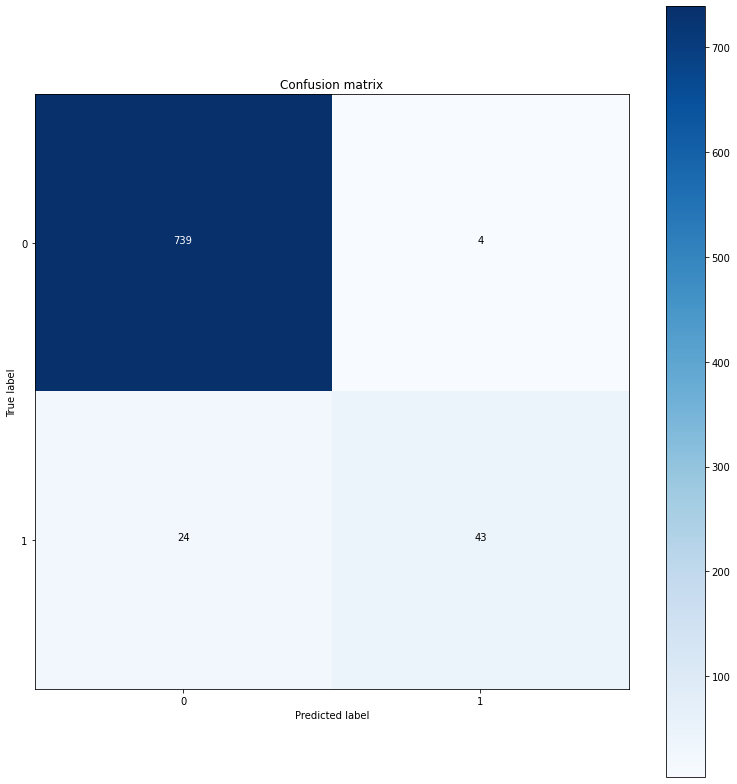

In [ ]:
import itertools 
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true,y_pred, classes, normalize=False, cmap=plt.cm.Blues, png_output=None, show=True):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = confusion_matrix(y_true,y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title='Normalized confusion matrix'
    else:
        title='Confusion matrix'

    # Calculate chart area size
    leftmargin = 0.5 # inches
    rightmargin = 0.5 # inches
    categorysize = 0.5 # inches
    figwidth = leftmargin + rightmargin + (20 * categorysize)           

    f = plt.figure(figsize=(figwidth, figwidth))
     # Create an axes instance and ajust the subplot size
    ax = f.add_subplot(111)
    ax.set_aspect(1)
    f.subplots_adjust(left=leftmargin/figwidth, right=1-rightmargin/figwidth, top=0.94, bottom=0.1)

    res = ax.imshow(cm, interpolation='nearest', cmap=cmap)

    plt.title(title)
    plt.colorbar(res)
    ax.set_xticks(range(2))
    ax.set_yticks(range(2))
    

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    # plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    if png_output is not None:
        os.makedirs(png_output, exist_ok=True)
        f.savefig(os.path.join(png_output,'confusion_matrix.png'), bbox_inches='tight')

    if show:
        plt.tight_layout()
        plt.savefig('Matrice de confusion.jpg')
        plt.show()
        plt.close(f)
    else:
        plt.close(f)
    

plot_confusion_matrix(y_test, y_pred, classes=2)

Support Vector Machine

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01],
              'kernel': [ 'rbf','linear']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X_train, y_train)
print("tuned hpyerparameters :(best parameters) ",grid.best_estimator_)
print("accuracy :",grid.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.925 total time=   2.4s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.924 total time=   2.3s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.924 total time=   2.3s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.924 total time=   2.3s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.924 total time=   2.3s


In [ ]:
svc=SVC(C=0.1,gamma=1,kernel='rbf')
svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)
print("score",svc.score(X_test,y_test))

score 0.928395061728395


Naive Bayes (Gaussian, Multinomial)

In [ ]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nbModel_grid.fit(X_train, y_train)
print("tuned hpyerparameters :(best parameters) ",nbModel_grid.best_estimator_)
print("accuracy :",nbModel_grid.best_score_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
tuned hpyerparameters :(best parameters)  GaussianNB(var_smoothing=1.0)
accuracy : 0.9230980268017305


Stochastic Gradient Descent Classifier

In [ ]:
params = {
    "loss" : ["hinge", "log", "squared_hinge", "modified_huber"],
    "alpha" : [0.0001, 0.001, 0.01, 0.1],
    "penalty" : ["l2", "l1", "none"],
}

model = SGDClassifier(max_iter=1000)
clf = GridSearchCV(model, param_grid=params)
clf.fit(X_train, y_train)
print("tuned hpyerparameters :(best parameters) ",clf.best_estimator_)
print("accuracy :",clf.best_score_)

tuned hpyerparameters :(best parameters)  SGDClassifier(loss='squared_hinge')
accuracy : 0.8591064734853342


KNN (k-nearest neighbor)

In [ ]:
estimator_KNN = KNeighborsClassifier(algorithm='auto')
parameters_KNN = {
    'n_neighbors': (1,10, 1),
    'leaf_size': (20,40,1),
    'p': (1,2),
    'weights': ('uniform', 'distance'),
    'metric': ('minkowski', 'chebyshev'),
}                 
# with GridSearch
grid_search_KNN = GridSearchCV(
    estimator=estimator_KNN,
    param_grid=parameters_KNN,
    scoring = 'accuracy',
    n_jobs = -1,
    cv = 5
)

KNN_1=grid_search_KNN.fit(X_train, y_train)
print("tuned hpyerparameters :(best parameters) ",grid_search_KNN.best_params_)
print('Best Score - KNN:', grid_search_KNN.best_score_ )

tuned hpyerparameters :(best parameters)  {'leaf_size': 20, 'metric': 'minkowski', 'n_neighbors': 10, 'p': 1, 'weights': 'distance'}
Best Score - KNN: 0.9379295292902018


Decision Tree

In [ ]:
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }
tree_clas = DecisionTreeClassifier(random_state=1024)
grid_search_tree = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
grid_search_tree.fit(X_train, y_train)
print("tuned hpyerparameters :(best parameters) ",grid_search_tree.best_estimator_)
print("accuracy :",grid_search_tree.best_score_)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
tuned hpyerparameters :(best parameters)  DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=5,
                       max_features='auto', random_state=1024)
accuracy : 0.9508366204831544


Random Forest

In [ ]:

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestClassifier(random_state=1024)
# Instantiate the grid search model
grid_search_rf = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search_rf.fit(X_train, y_train)
print("tuned hpyerparameters :(best parameters) ",grid_search_rf.best_estimator_)
print("accuracy :",grid_search_rf.best_score_)


Fitting 3 folds for each of 288 candidates, totalling 864 fits
tuned hpyerparameters :(best parameters)  RandomForestClassifier(max_depth=80, max_features=3, min_samples_leaf=3,
                       min_samples_split=8, n_estimators=200,
                       random_state=1024)
accuracy : 0.9651196599123851


LGBM Classifier

In [ ]:
grid_params = {'learning_rate': [0.01,0.001], 'n_estimators': [8, 24],
                   'num_leaves': [6, 8, 12, 16], 'boosting_type': ['gbdt'], 
                   'objective': ['binary'], 'seed': [500],
                   'colsample_bytree': [0.65, 0.75, 0.8], 
                   'subsample': [0.7, 0.75], 'reg_alpha': [1, 2, 6],
                   'reg_lambda': [1, 2, 6]}
mod = LGBMClassifier()
grid = GridSearchCV(mod, param_grid=grid_params, verbose=1, cv=5, n_jobs=-1)
    # Run the grid
grid.fit(X_train, y_train)
print("tuned hpyerparameters :(best parameters) ",grid.best_estimator_)
print("accuracy :",grid.best_score_)

Fitting 5 folds for each of 864 candidates, totalling 4320 fits
tuned hpyerparameters :(best parameters)  LGBMClassifier(colsample_bytree=0.65, learning_rate=0.01, n_estimators=8,
               num_leaves=6, objective='binary', reg_alpha=1, reg_lambda=1,
               seed=500, subsample=0.7)
accuracy : 0.9230980412860991


XGBoost Classifier

In [ ]:
estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}
grid_search_XGB = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=True
)
grid_search_XGB.fit(X_train, y_train)
print("tuned hpyerparameters :(best parameters) ",grid_search_XGB.best_estimator_)
print("accuracy :",grid_search_XGB.best_score_)

Fitting 10 folds for each of 96 candidates, totalling 960 fits
tuned hpyerparameters :(best parameters)  XGBClassifier(max_depth=8, nthread=4, seed=42)
accuracy : 0.9535041428811496


#<a name="Modelling"></a>

##  11. TigerGraph Graph Data Science Library

#<a name="Dashbord"></a>

##  12.  Dashbord


In [ ]:

external_stylesheets = [
    {
        'https://fonts.googleapis.com/css2?family=Lato:wght@400;700&display=swap'
    },
]
data = pd.read_csv("/content/drive/MyDrive/tigerGraph/avocado.csv")
data = data.query("type == 'conventional' and region == 'Albany'")
data["Date"] = pd.to_datetime(data["Date"], format="%Y-%m-%d")
data.sort_values("Date", inplace=True)


app = dash.Dash(__name__, external_stylesheets=external_stylesheets)
app.title = "IT7 Analytics: Comprenez les Crises Economiques !"

app.layout = html.Div(
    children=[
             html.Div(children=[
                html.P(children="💰", className="header-emoji"),

                html.H1(
                    children="IT7 Analytics", className="header-title"
                ),

                html.P(
                    children="Analysez le comportement des crises financieres"
                    " et  les  relations entre  differents pays concernes"
                    " à partir de  donnes modeliser sur Tigergraph ",
                    className="header-description",
                ),
                 




             ]
             
             ,className="header"
             
             
             ),
            html.Div(
                    children=[

                        html.Div(
                            children=[
                                html.Div(children="Type Donné", className="menu-title"),
                                dcc.Dropdown(['Banking Crisis ', 'Currency Crises', 'Inflation Crises'], 'Banking Crisis', id="type-filter",
                                    className="dropdown",),
                                
                            ],
                        ),
                        html.Div(
                            children=[
                                html.Div(children="Importer les Données", className="menu-title"),
                                dcc.Upload(
                                    id="upload-data",
                                    children=html.Div([
                                    html.A('Selection de Fichier')
                                    ]),
                                    style={
                                    'appearance': 'none',
                                    'text-align': 'center',
                                    'text-decoration': 'none',
                                    'user-select':' none',
                                    '-webkit-user-select': 'none',
                                    'touch-action': 'manipulation',
                                    'vertical-align': 'middle',
                                    'borderRaduis':'5px',
                                    'cursor':'pointer',
                                    'white-space': 'nowrap',
                                    'font-size':'17px',    
                                    'width': '100%',
                                    'height': '43px',
                                    'lineHeight': '40px',
                                    'borderWidth': '1px',
                                    'borderStyle': 'solid',
                                    'padding': '2px 9px',
                                    'borderColor':'#CFCFCF',
                                    
                                    'textAlign': 'center',
                                    
                                },
                                    
                                    className="dropdown",
                                ),
                            ]
                        ),
                        
                        html.Div(
                            children=[
                                html.Div(
                                    children="Plage de dates", className="menu-title"
                                ),
                                dcc.DatePickerRange(
                                    id="date-range",
                                    min_date_allowed=data.Date.min().date(),
                                    max_date_allowed=data.Date.max().date(),
                                    start_date=data.Date.min().date(),
                                    end_date=data.Date.max().date(),
                                ),
                            ]
                        ),
                    ],
                    className="menu",
        ),

             html.Div(

                 children=[

                      html.Div(

                          children=dcc.Graph(
                                 id="price-chart",
                                 config={"displayModeBar": False},
                                figure={

                                    "data": [

                                        dict(type = 'choropleth',
                                            locations = ['tunisia','denmark','china','france','United Kingdom','turkey'],
                                            locationmode = 'country names',
                                            
                                            
                                            text= ['TUN','DEN','CHI','FRA','GBR', 'FRA','TUR'],
                                            z=[1.0,1.0,1.0,1.0,1.0,1.0],
                                            # marker = dict(line = dict(color = 'rgb(255,255,255)',width = 1)),
                                            colorbar = {'len':100,'lenmode':'pixels' ,'coloraxis':None },
                                            
                                            )
                                    ],
                                    "layout": {
                                        "title": {
                                            "text": "Les Pays en crises (financiere)",
                                            "x": 0.05,
                                            "xanchor": "left",
                                            
                                        },
                                        "height":"650",
                                        "xaxis": {"fixedrange": True},
                                        "yaxis": {
                                            "tickprefix": "$",
                                            "fixedrange": True,
                                        },
                                        "colorway": ["#17B897"],


                                    },

                                },



                          ),className="card",

                          
                      ),
                       html.Div(children=[

                           
                           html.P(
                                children='Les Relations entre Pays qui sont en Crise Financiére',
                                style={
                                    
                                    'font-size':'17px',
                                    'color': "#001524",
                                    'font-weight':'700'
                                   
                                   
                                    }
                                ),

                           cyto.Cytoscape(
                                className='card',
                                responsive=True,
                                id='cytoscape',
                              
                                elements=[
                                    {'data': {'id': 'ca', 'label': 'Tunisie'}}, 
                                    {'data': {'id': 'on', 'label': 'Danemark'}}, 
                                    {'data': {'id': 'qc', 'label': 'Chine'}},
                                    {'data': {'id': 'fr', 'label': 'France'}},
                                    {'data': {'id': 'ru', 'label': 'Royaume Unie'}},
                                    {'data': {'id': 'tr', 'label': 'Turquie'}},
                                    {'data': {'source': 'ca', 'target': 'on'}}, 
                                    {'data': {'source': 'ca', 'target': 'qc'}},
                                    {'data': {'source': 'qc', 'target': 'fr'}},
                                    {'data': {'source': 'ru', 'target': 'fr'}},
                                    {'data': {'source': 'tr', 'target': 'qc'}},
                                    {'data': {'source': 'ru', 'target': 'qc'}}

                                    # {'data': {'id': 'tu', 'label': 'Tunisie'}}, 
                                    # {'data': {'id': 'da', 'label': 'Danemarque'}}, 
                                    # {'data': {'id': 'ch', 'label': 'Chine'}},
                                    # {'data': {'id': 'fr', 'label': 'France'}},
                                    # {'data': {'id': 'ru', 'label': 'Royaume Unie'}},
                                    # {'data': {'id': 'tur', 'label': 'Turquie'}},
                                    # {'data': {'source': 'ch', 'target': 'tur'}}, 
                                    # {'data': {'source': 'da', 'target': 'ch'}},
                                    # {'data': {'source': 'fr', 'target': 'ch'}},
                                    # {'data': {'source': 'tu', 'target': 'ch'}},
                                    # {'data': {'source': 'ru', 'target': 'fr'}},
                                    # {'data': {'source': 'da', 'target': 'fr'}}
                                    # {'data': {'source': 'tur', 'target': 'ch'}}
                                ],
                               layout={'name': 'circle'},
                                style={'height': '400px','margin-top':'20px'},
                                stylesheet=[
        # Group selectors
                                        {
                                            'selector': 'node',
                                            
                                            'style': {
                                                'content': 'data(label)',
                                                'text-halign':'center',
                                                    'text-valign':'center',
                                                    'width':'label',
                                                    'height':'label',
                                                    'shape':'square',
                                                'background-color':'#001524',
                                                'padding':'3px',
                                                
                                                'height': '25px',
                                                
                                                'color':'#FFFFFF'
                                            }
                                        },]



                           ),


                       ],
                           
                           
                           


                       ),



                 ],

                  className="wrapper",
             ),
       

    ]
)



#  html.Div(
#             children=[
#                 html.P(children="💰", className="header-emoji"),
                # html.H1(
                #     children="IT7 Analytics", className="header-title"
                # ),
                # html.P(
                #     children="Analysez le comportement des crises financieres"
                #     " et  les  relations entre  differents pays concernes"
                #     " à partir de  ces ",
                #     className="header-description",
                # ),
#             ],

#             className="header",
           
        # # html.H1(children=" ",className="header-title",),
        # # html.P(
        #     # children="Analysez le comportement des crises financieres"
        #     # " et  les  relations entre  differents pays concernes"
        #     # " à partir de  ces ",
        # # ),
        # dcc.Graph(
            # figure={
                # "data": [

                #     dict(type = 'choropleth',
                #         locations = ['ivory coast','denmark','china','france','Bangladesh','bhutan','myanmar','srilanka'],
                #         locationmode = 'country names',
                        
                        
                #         text= ['CIV','DEN','CHI','FRA','BHU', 'FRA','SLK'],
                #         z=[1.0,1.0,1.0,1.0,1.0,1.0],
                #         # marker = dict(line = dict(color = 'rgb(255,255,255)',width = 1)),
                #         colorbar = {'len':100,'lenmode':'pixels' ,'coloraxis':None },
                        
                #         )
                # ],
            #     "layout": {"title": "Les Pays en crises (financiere)",
            #     "scope":"world",
            #     # "height":"800",
                
                
                
                
                
                
            #     },
                

                
        #     },


    #     ),

    #     html.Div(children=[
            #   html.P(
            #         children='Les Relations entre Pays qui sont en Crise Financiére',
                    # style={
                    #     # 'font-size':'25px',
                        
                    #     'color': "#001524",
                    #     'text-align':'center'
                    #     }
                    # ),

    #         cyto.Cytoscape(
    #             id='cytoscape',
                # elements=[
                #     {'data': {'id': 'ca', 'label': 'Canada'}}, 
                #     {'data': {'id': 'on', 'label': 'Ontario'}}, 
                #     {'data': {'id': 'qc', 'label': 'Quebec'}},
                #     {'data': {'source': 'ca', 'target': 'on'}}, 
                #     {'data': {'source': 'ca', 'target': 'qc'}}
                # ],
                # layout={'name': 'breadthfirst'},
    #             style={'height': '350px','margin': '0px 15% 0px 15% '}
    #         )
    #     ])
       






if __name__ == "__main__":
    app.run_server(port = 5000)

Dash is running on http://127.0.0.1:5000/

Dash is running on http://127.0.0.1:5000/

Dash is running on http://127.0.0.1:5000/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
